<a href="https://colab.research.google.com/github/Sievv/Sievv/blob/main/KP_Classification_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Data

# New Section

In [44]:
!pip install PyGitHub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 39.7 MB/s eta 0:00:00


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


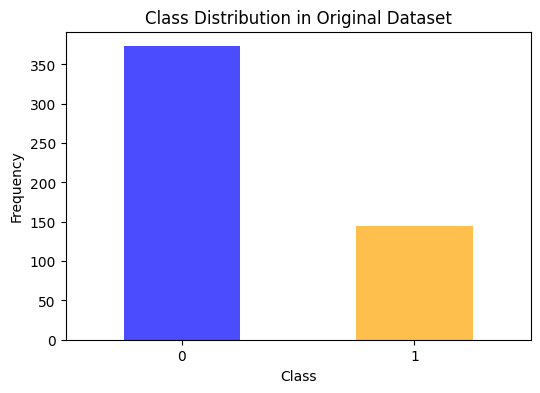

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/active_descriptors 21.25.csv')
inactive = pd.read_csv('/content/drive/MyDrive/thesis project /CLasification KP/Inactive dataset v1.csv')

# Combine and shuffle datasets
data = pd.concat([active, inactive], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot original class distribution
plt.figure(figsize=(6, 4))
data['Activity'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Class Distribution in Original Dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


Code to Check Data Quality

In [7]:
import pandas as pd

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/active_descriptors 21.25.csv')
inactive = pd.read_csv('/content/drive/MyDrive/inactive_descriptors v1.1.csv')

# Combine datasets
data = pd.concat([active, inactive], ignore_index=True)

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(data.duplicated().sum())

# Basic summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Data types of columns
print("\nData Types:")
print(data.dtypes)


Missing Values:
ID                             0
Sequence                       0
Length                         0
Charge                         0
Hydrophobicity                 0
Molecular_Weight               0
Isoelectric_Point              0
Number_of_Cysteines            0
Number_of_Disulfide_Bridges    0
Flexibility                    0
Helix                          0
Turn                           0
Sheet                          0
A                              0
C                              0
D                              0
E                              0
F                              0
G                              0
H                              0
I                              0
K                              0
L                              0
M                              0
N                              0
P                              0
Q                              0
R                              0
S                              0
T                          

apply smote to training set , to banlance the data

In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from google.colab import files

# Load datasets
active = pd.read_csv('//content/drive/MyDrive/active_descriptors 21.25.csv')
inactive = pd.read_csv('/content/drive/MyDrive/inactive_descriptors v1.1.csv')

# Combine datasets
data = pd.concat([active, inactive], ignore_index=True)

# Shuffle dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined dataset to a CSV file
data.to_csv('/content/combined_data.csv', index=False)

# Download the combined dataset
files.download('/content/combined_data.csv')

# Drop unnecessary columns (e.g., ID, Sequence)
data.drop(columns=['ID', 'Sequence'], inplace=True, errors='ignore')

# Separate features and target
X = data.drop(columns=['Activity'])
y = data['Activity']

# Split the data into different ratios and apply SMOTE only on the training set
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    # Apply SMOTE only on the training set
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Create a new DataFrame with resampled training data
    resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_data['Activity'] = y_resampled

    # Show data distribution before and after SMOTE
    print(f"Train size {train_size*100}% - Test size {test_size*100}%")
    print("Before SMOTE (Training set):")
    print(y_train.value_counts())
    print("After SMOTE (Training set):")
    print(y_resampled.value_counts())

    # Optionally, save the resampled data for each split
    resampled_data.to_csv(f'/content/resampled_data_{int(train_size*100)}_{int(test_size*100)}.csv', index=False)

    # Download the resampled data for each split
    files.download(f'/content/resampled_data_{int(train_size*100)}_{int(test_size*100)}.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train size 90.0% - Test size 10.0%
Before SMOTE (Training set):
Activity
0    306
1    125
Name: count, dtype: int64
After SMOTE (Training set):
Activity
0    306
1    306
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train size 80.0% - Test size 20.0%
Before SMOTE (Training set):
Activity
0    275
1    108
Name: count, dtype: int64
After SMOTE (Training set):
Activity
0    275
1    275
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train size 70.0% - Test size 30.0%
Before SMOTE (Training set):
Activity
0    237
1     98
Name: count, dtype: int64
After SMOTE (Training set):
Activity
0    237
1    237
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train size 60.0% - Test size 40.0%
Before SMOTE (Training set):
Activity
0    203
1     84
Name: count, dtype: int64
After SMOTE (Training set):
Activity
0    203
1    203
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-fa7bdee19a7c>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")
<ipython-input-9-fa7bdee19a7c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set1")


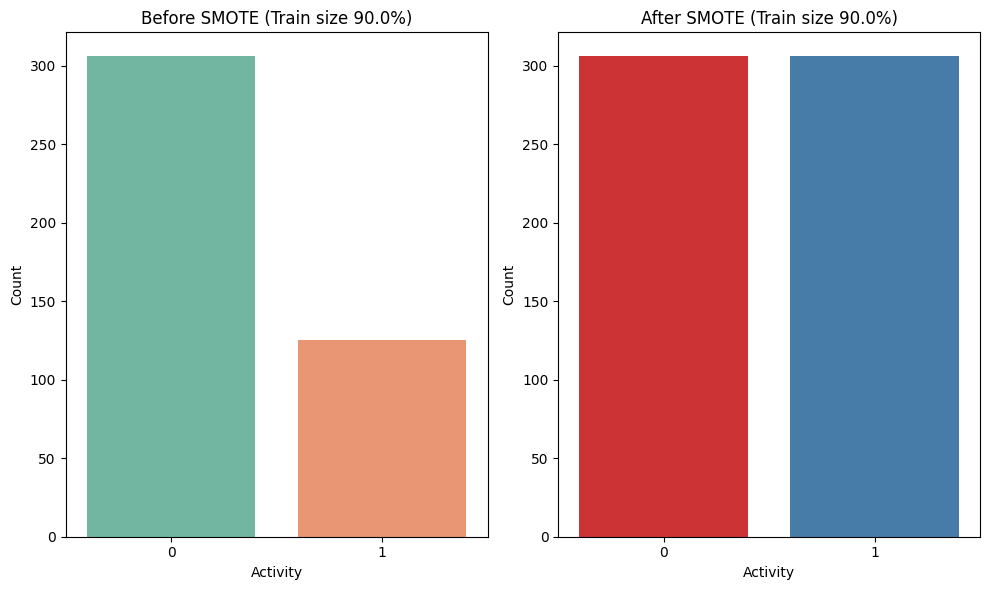

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-fa7bdee19a7c>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")
<ipython-input-9-fa7bdee19a7c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set1")


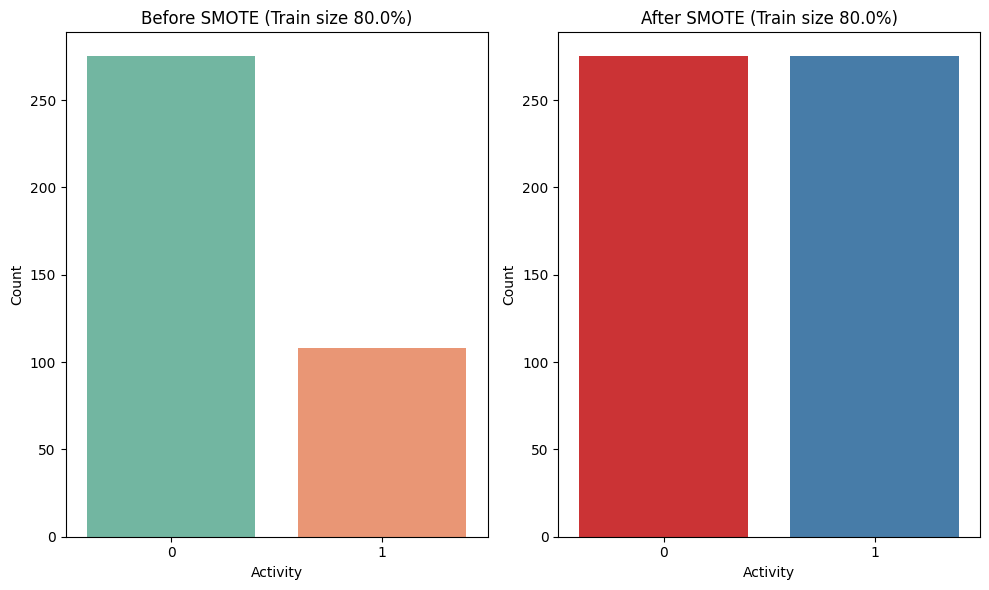

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-fa7bdee19a7c>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")
<ipython-input-9-fa7bdee19a7c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set1")


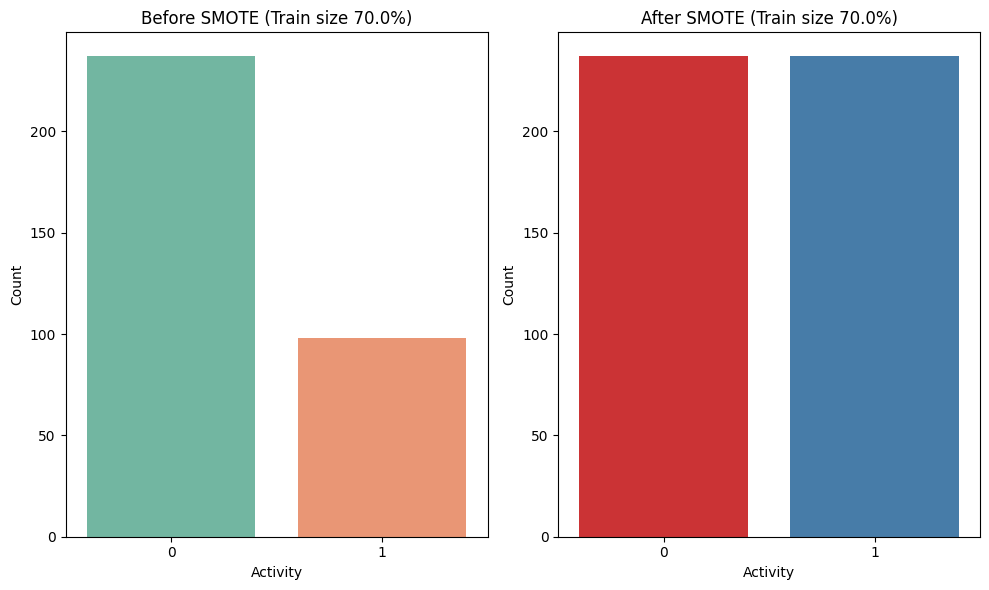

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-fa7bdee19a7c>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")
<ipython-input-9-fa7bdee19a7c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set1")


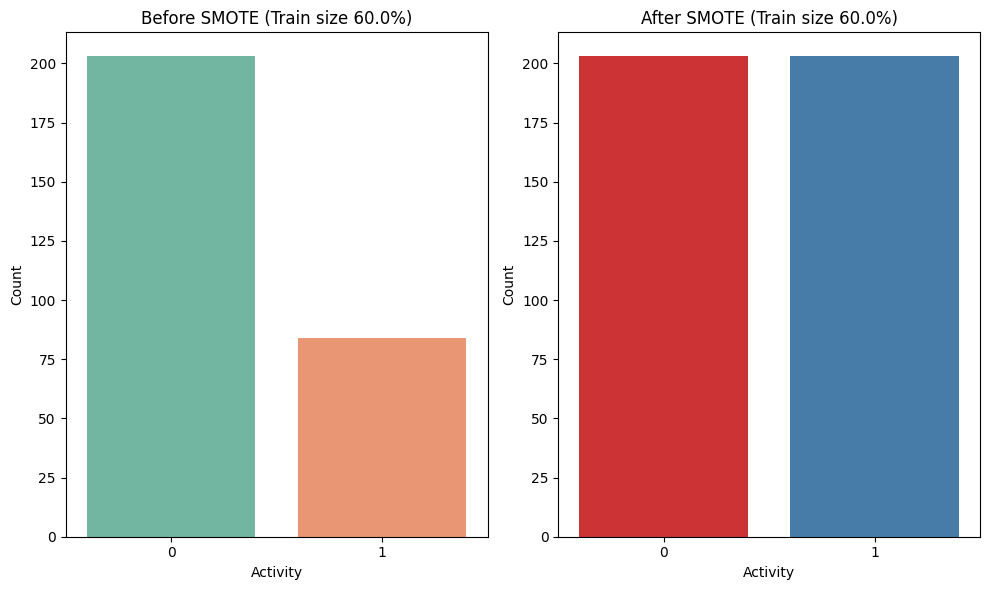

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from google.colab import files

# Load datasets
active = pd.read_csv('/content/drive/MyDrive/active_descriptors 21.25.csv')
inactive = pd.read_csv('/content/drive/MyDrive/inactive_descriptors v1.1.csv')

# Combine datasets
data = pd.concat([active, inactive], ignore_index=True)

# Shuffle dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined dataset to a CSV file
data.to_csv('/content/combined_data.csv', index=False)

# Download the combined dataset
files.download('/content/combined_data.csv')

# Drop unnecessary columns (e.g., ID, Sequence)
data.drop(columns=['ID', 'Sequence'], inplace=True, errors='ignore')

# Separate features and target
X = data.drop(columns=['Activity'])
y = data['Activity']

# Split the data into different ratios and apply SMOTE only on the training set
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    # Apply SMOTE only on the training set
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Plotting data distribution before and after SMOTE
    plt.figure(figsize=(10, 6))

    # Plot before SMOTE (training set)
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train, palette="Set2")
    plt.title(f"Before SMOTE (Train size {train_size*100}%)")
    plt.xlabel("Activity")
    plt.ylabel("Count")

    # Plot after SMOTE (resampled training set)
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_resampled, palette="Set1")
    plt.title(f"After SMOTE (Train size {train_size*100}%)")
    plt.xlabel("Activity")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

    # Optionally, save the resampled data for each split
    resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_data['Activity'] = y_resampled

    resampled_data.to_csv(f'/content/resampled_data_{int(train_size*100)}_{int(test_size*100)}.csv', index=False)

    # Download the resampled data for each split
    files.download(f'/content/resampled_data_{int(train_size*100)}_{int(test_size*100)}.csv')


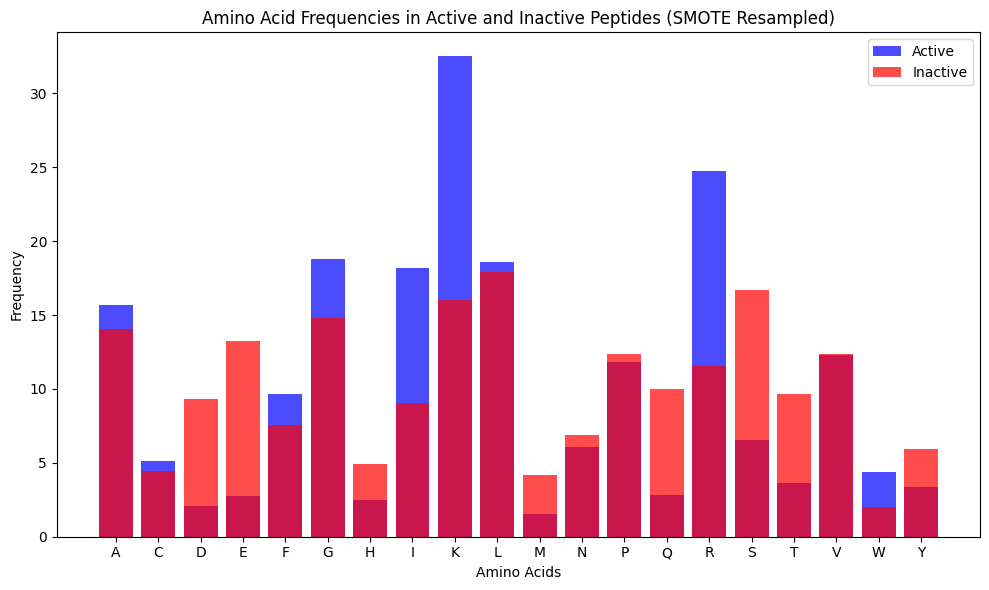

In [10]:
import matplotlib.pyplot as plt

# Assuming you already have the SMOTE applied data in resampled_data

# Separate active and inactive data from the resampled dataset
active_data_resampled = resampled_data[resampled_data['Activity'] == 1]
inactive_data_resampled = resampled_data[resampled_data['Activity'] == 0]

# Define the amino acid columns (A, C, D, ..., Y) from your dataset
aa_columns = [
    'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
    'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'
]

# Calculate the frequency of each amino acid for active and inactive
active_freq = active_data_resampled[aa_columns].sum(axis=0)
inactive_freq = inactive_data_resampled[aa_columns].sum(axis=0)

# Plotting the histogram
plt.figure(figsize=(10, 6))

# Plot active frequencies in blue
plt.bar(aa_columns, active_freq, alpha=0.7, label='Active', color='blue')

# Plot inactive frequencies in red
plt.bar(aa_columns, inactive_freq, alpha=0.7, label='Inactive', color='red')

# Add labels and title
plt.xlabel('Amino Acids')
plt.ylabel('Frequency')
plt.title('Amino Acid Frequencies in Active and Inactive Peptides (SMOTE Resampled)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


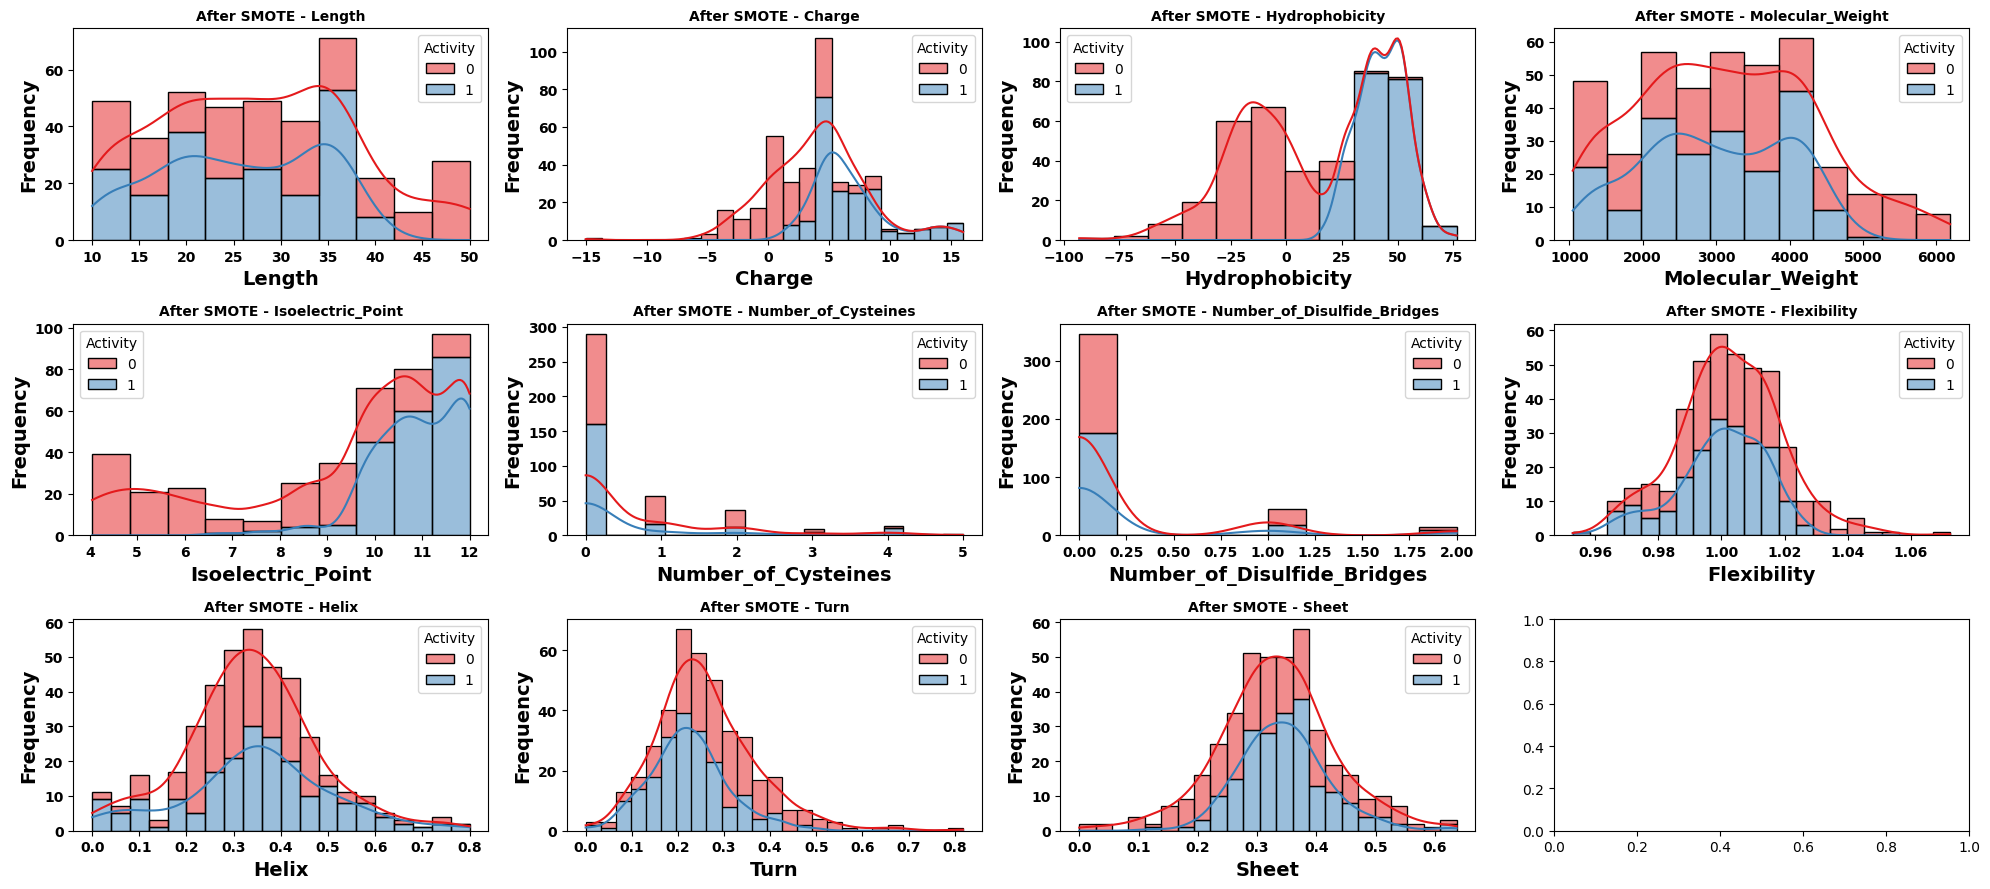

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# List of selected features
selected_features = [
    'Length', 'Charge', 'Hydrophobicity', 'Molecular_Weight', 'Isoelectric_Point',
    'Number_of_Cysteines', 'Number_of_Disulfide_Bridges', 'Flexibility',
    'Helix', 'Turn', 'Sheet'
]

# Filter the dataset to include only the selected features
X_selected = X_resampled[selected_features]

# Calculate the number of rows needed for the plots
num_features = len(selected_features)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

# Set suitable figure size based on the number of rows and columns
feature_width = 5  # Width for each feature's plot
feature_height = 3  # Height for each feature's plot
fig_width = 4 * feature_width  # 4 columns per row
fig_height = num_rows * feature_height  # Height depending on the number of rows

# Plotting data distribution after SMOTE for selected features
fig, axes = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))  # Adjust height based on number of rows
axes = axes.flatten()

# Font properties for bold text
font_properties = font_manager.FontProperties(weight='bold')

# Loop to plot the distribution after SMOTE (resampled training set)
for i, feature in enumerate(selected_features):
    sns.histplot(x=X_selected[feature], hue=y_resampled, multiple="stack", kde=True, ax=axes[i], palette="Set1")
    axes[i].set_title(f"After SMOTE - {feature}", fontsize=16, fontweight='bold', fontproperties=font_properties)  # Bold font for title
    axes[i].set_xlabel(feature, fontsize=14, fontweight='bold', fontproperties=font_properties)  # Bold font for x-axis label
    axes[i].set_ylabel('Frequency', fontsize=14, fontweight='bold', fontproperties=font_properties)  # Bold font for y-axis label

    # Set the tick labels to be bold
    for tick in axes[i].get_xticklabels() + axes[i].get_yticklabels():
        tick.set_fontweight('bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


this is separate the activity and inactive

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from google.colab import files

# Check for missing values and handle them
if X.isnull().sum().any():
    print("Missing values found in features. Filling missing values with the mean of each column.")
    X.fillna(X.mean(), inplace=True)

if y.isnull().sum().any():
    print("Missing values found in target. Filling missing values with the mean.")
    y.fillna(y.mean(), inplace=True)

# Define splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and save the data
for train_size, test_size in splits:
    print(f"\nSaving split data for train size {train_size*100}% and test size {test_size*100}%")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    # Standard scaling of features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
    X_test_scaled = scaler.transform(X_test)  # Only transform the test data

    # Apply SMOTE to the training set only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Save the split data
    X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

    # Save and download files for each split
    X_train_resampled_df.to_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv', index=False)
    X_test_scaled_df.to_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv', index=False)
    y_train_resampled.to_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv', index=False)
    y_test.to_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv', index=False)

    # Trigger download
    files.download(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    files.download(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    files.download(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    files.download(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')



Saving split data for train size 90.0% and test size 10.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saving split data for train size 80.0% and test size 20.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saving split data for train size 70.0% and test size 30.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saving split data for train size 60.0% and test size 40.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

try logistic first

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
print("Random Forest:", cross_val_score(rf, X, y, cv=5).mean())


Random Forest: 0.898


wnat to make sure all split captuare all feature 31

In [23]:
!pip install -U scikit-learn

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "k-NN": KNeighborsClassifier(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "RBF SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Define different train-test splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Perform cross-validation for each split
for train_size, test_size in splits:
    print(f"\nCross-Validation Results for Train size {train_size*100}% and Test size {test_size*100}%:")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    #X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')  # Not used in cross-validation
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    #y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')  # Not used in cross-validation

    # Perform cross-validation and store results for the current split
    results = {}
    for name, model in models.items():
        score = cross_val_score(model, X_train_resampled, y_train_resampled.values.ravel(), cv=5).mean()
        results[name] = round(score, 4)

    # Print sorted results for the current split
    for name, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
        print(f"{name}: {score}")


Cross-Validation Results for Train size 90.0% and Test size 10.0%:


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

RBF SVM: 0.9984
Extra Trees: 0.9967
MLP Neural Net: 0.9951
AdaBoost: 0.9935
QDA: 0.9935
Random Forest: 0.9918
Gradient Boosting: 0.9885
k-NN: 0.9592
Naive Bayes: 0.933

Cross-Validation Results for Train size 80.0% and Test size 20.0%:


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

RBF SVM: 0.9964
MLP Neural Net: 0.9945
AdaBoost: 0.9909
Extra Trees: 0.9909
QDA: 0.9909
Random Forest: 0.9836
Gradient Boosting: 0.9709
k-NN: 0.96
Naive Bayes: 0.9473

Cross-Validation Results for Train size 70.0% and Test size 30.0%:


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

RBF SVM: 0.9979
Extra Trees: 0.9937
QDA: 0.9916
AdaBoost: 0.9895
Random Forest: 0.9873
Gradient Boosting: 0.9831
MLP Neural Net: 0.9831
k-NN: 0.9536
Naive Bayes: 0.9452

Cross-Validation Results for Train size 60.0% and Test size 40.0%:
RBF SVM: 1.0
Extra Trees: 0.9975
AdaBoost: 0.9951
Random Forest: 0.9852
Gradient Boosting: 0.9852
QDA: 0.9852
MLP Neural Net: 0.9827
Naive Bayes: 0.9458
k-NN: 0.936


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

make sure 31 descriptors

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "k-NN": KNeighborsClassifier(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "RBF SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

results = {}
for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5).mean()
    results[name] = round(score, 4)

# Print sorted results
for name, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score}")


AdaBoost: 0.9896
Random Forest: 0.9875
Extra Trees: 0.9854
Gradient Boosting: 0.9771
QDA: 0.975
MLP Neural Net: 0.9625
Naive Bayes: 0.9521
k-NN: 0.904
RBF SVM: 0.6994


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

In [26]:
# After loading X_train_resampled for each split
for train_size, test_size in splits:
    # Load the training data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')

    # Count the number of descriptors (features) the model is using
    num_descriptors = X_train_resampled.shape[1]
    print(f"Number of descriptors used in the model for train size {train_size*100}%: {num_descriptors}")


Number of descriptors used in the model for train size 90.0%: 31
Number of descriptors used in the model for train size 80.0%: 31
Number of descriptors used in the model for train size 70.0%: 31
Number of descriptors used in the model for train size 60.0%: 31


In [27]:
# Check feature importance
for train_size, test_size in splits:
    # Load the training data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')

    # Initialize and train the RandomForestClassifier model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Get feature importances
    feature_importance = model.feature_importances_ # Changed to feature_importances_

    # Create a DataFrame of descriptors and their importances
    feature_names = X_train_resampled.columns
    importance_df = pd.DataFrame({
        'Descriptor': feature_names,
        'Importance': feature_importance # Changed to Importance
    })

    # Sort the descriptors by their importances
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print(f"Feature importance for train size {train_size*100}%:")
    print(importance_df.head(10))  # Show top 10 most important descriptors

Feature importance for train size 90.0%:
           Descriptor  Importance
2      Hydrophobicity    0.290082
1              Charge    0.145599
4   Isoelectric_Point    0.105177
13                  D    0.056198
14                  E    0.042583
19                  K    0.037073
18                  I    0.036629
26                  S    0.033024
25                  R    0.031110
24                  Q    0.021396
Feature importance for train size 80.0%:
           Descriptor  Importance
2      Hydrophobicity    0.282608
1              Charge    0.165321
4   Isoelectric_Point    0.113652
13                  D    0.057670
19                  K    0.053146
26                  S    0.042943
14                  E    0.037100
18                  I    0.028109
24                  Q    0.025907
25                  R    0.021616
Feature importance for train size 70.0%:
           Descriptor  Importance
2      Hydrophobicity    0.300916
1              Charge    0.137406
4   Isoelectric_Point    0.

use cross validation to make sure each run , captuare and meaningfull

In [29]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, matthews_corrcoef, f1_score, roc_auc_score, balanced_accuracy_score, precision_score, confusion_matrix, average_precision_score

# Define the models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "k-NN": KNeighborsClassifier(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "RBF SVM": SVC(kernel='rbf', probability=True), # Added probability=True for PR AUC
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Function to calculate and print performance metrics
def calculate_and_print_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    sen = recall_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)  # Use probabilities for AUC
    bcc = balanced_accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    spc = tn / (tn + fp)
    pr_auc = average_precision_score(y_true, y_prob)  # Use probabilities for PR AUC

    print(f"Accuracy: {acc:.4f}")
    print(f"Sensitivity/Recall: {sen:.4f}")
    print(f"Specificity: {spc:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {auc:.4f}")
    print(f"Balanced Accuracy: {bcc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print("-" * 30)  # Separator line

# Loop over each split ratio and train the models
for train_size, test_size in splits:
    print(f"\nTraining and Evaluating Models for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Loop through each model
    for name, model in models.items():
        print(f"Model: {name}")

        # Train the model on the training data
        model.fit(X_train_resampled, y_train_resampled.values.ravel())

        # Make predictions and get probabilities on the test data
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (active)

        # Calculate and print performance metrics for the current model
        calculate_and_print_metrics(y_test, y_pred, y_prob)



Training and Evaluating Models for Train size 90.0% and Test size 10.0%
Model: Random Forest
Accuracy: 0.9792
Sensitivity/Recall: 0.9474
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9982
Balanced Accuracy: 0.9737
Precision: 1.0000
PR-AUC: 0.9974
------------------------------
Model: Gradient Boosting
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9655
Matthews Correlation Coefficient: 0.9577
F1 Score: 0.9744
ROC-AUC Score: 0.9873
Balanced Accuracy: 0.9828
Precision: 0.9500
PR-AUC: 0.9745
------------------------------
Model: AdaBoost
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9655
Matthews Correlation Coefficient: 0.9577
F1 Score: 0.9744
ROC-AUC Score: 1.0000
Balanced Accuracy: 0.9828
Precision: 0.9500
PR-AUC: 1.0000
------------------------------
Model: Extra Trees
Accuracy: 0.9792
Sensitivity/Recall: 0.9474
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9982


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Accuracy: 0.9583
Sensitivity/Recall: 0.8947
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9149
F1 Score: 0.9444
ROC-AUC Score: 1.0000
Balanced Accuracy: 0.9474
Precision: 1.0000
PR-AUC: 1.0000
------------------------------

Training and Evaluating Models for Train size 80.0% and Test size 20.0%
Model: Random Forest
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9667
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9981
Balanced Accuracy: 0.9833
Precision: 0.9474
PR-AUC: 0.9970
------------------------------
Model: Gradient Boosting
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9667
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9843
Balanced Accuracy: 0.9833
Precision: 0.9474
PR-AUC: 0.9503
------------------------------
Model: AdaBoost
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9667
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9995
Balanced Accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Accuracy: 0.9792
Sensitivity/Recall: 0.9444
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9560
F1 Score: 0.9714
ROC-AUC Score: 0.9995
Balanced Accuracy: 0.9722
Precision: 1.0000
PR-AUC: 0.9992
------------------------------

Training and Evaluating Models for Train size 70.0% and Test size 30.0%
Model: Random Forest
Accuracy: 0.9722
Sensitivity/Recall: 0.9348
Specificity: 0.9898
Matthews Correlation Coefficient: 0.9359
F1 Score: 0.9556
ROC-AUC Score: 0.9920
Balanced Accuracy: 0.9623
Precision: 0.9773
PR-AUC: 0.9874
------------------------------
Model: Gradient Boosting
Accuracy: 0.9722
Sensitivity/Recall: 0.9565
Specificity: 0.9796
Matthews Correlation Coefficient: 0.9361
F1 Score: 0.9565
ROC-AUC Score: 0.9674
Balanced Accuracy: 0.9681
Precision: 0.9565
PR-AUC: 0.9279
------------------------------
Model: AdaBoost
Accuracy: 0.9722
Sensitivity/Recall: 0.9565
Specificity: 0.9796
Matthews Correlation Coefficient: 0.9361
F1 Score: 0.9565
ROC-AUC Score: 0.9898
Balanced Accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Model: Random Forest
Accuracy: 0.9792
Sensitivity/Recall: 0.9500
Specificity: 0.9924
Matthews Correlation Coefficient: 0.9514
F1 Score: 0.9661
ROC-AUC Score: 0.9954
Balanced Accuracy: 0.9712
Precision: 0.9828
PR-AUC: 0.9919
------------------------------
Model: Gradient Boosting
Accuracy: 0.9740
Sensitivity/Recall: 0.9667
Specificity: 0.9773
Matthews Correlation Coefficient: 0.9397
F1 Score: 0.9587
ROC-AUC Score: 0.9718
Balanced Accuracy: 0.9720
Precision: 0.9508
PR-AUC: 0.9288
------------------------------
Model: AdaBoost
Accuracy: 0.9792
Sensitivity/Recall: 0.9667
Specificity: 0.9848
Matthews Correlation Coefficient: 0.9515
F1 Score: 0.9667
ROC-AUC Score: 0.9852
Balanced Accuracy: 0.9758
Precision: 0.9667
PR-AUC: 0.9834
------------------------------
Model: Extra Trees
Accuracy: 0.9792
Sensitivity/Recall: 0.9500
Specificity: 0.9924
Matthews Correlation Coefficient: 0.9514
F1 Score: 0.9661
ROC-AUC Score: 0.9943
Balanced Accuracy: 0.9712
Precision: 0.9828
PR-AUC: 0.9903
--------------

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [31]:
import pickle

# ... (your existing code) ...

# Loop over each split ratio and train the models
for train_size, test_size in splits:
    print(f"\nTraining and Evaluating Models for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Loop through each model
    for name, model in models.items():
        print(f"Model: {name}")

        # Train the model on the training data
        model.fit(X_train_resampled, y_train_resampled.values.ravel())

        # Make predictions and get probabilities on the test data
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (active)

        # Calculate and print performance metrics for the current model
        calculate_and_print_metrics(y_test, y_pred, y_prob)

        # Save the trained model
        filename = f'/content/drive/MyDrive/{name}_{train_size*100:.0f}_{test_size*100:.0f}_model.pkl'
        pickle.dump(model, open(filename, 'wb'))
        print(f"{name} model saved to {filename}")


Training and Evaluating Models for Train size 90.0% and Test size 10.0%
Model: Random Forest
Accuracy: 0.9792
Sensitivity/Recall: 0.9474
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9982
Balanced Accuracy: 0.9737
Precision: 1.0000
PR-AUC: 0.9974
------------------------------
Random Forest model saved to /content/drive/MyDrive/Random Forest_90_10_model.pkl
Model: Gradient Boosting
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9655
Matthews Correlation Coefficient: 0.9577
F1 Score: 0.9744
ROC-AUC Score: 0.9909
Balanced Accuracy: 0.9828
Precision: 0.9500
PR-AUC: 0.9820
------------------------------
Gradient Boosting model saved to /content/drive/MyDrive/Gradient Boosting_90_10_model.pkl
Model: AdaBoost
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9655
Matthews Correlation Coefficient: 0.9577
F1 Score: 0.9744
ROC-AUC Score: 1.0000
Balanced Accuracy: 0.9828
Precision: 0.9500
PR-AUC: 1.0000
----------------------

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Accuracy: 0.9583
Sensitivity/Recall: 0.8947
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9149
F1 Score: 0.9444
ROC-AUC Score: 1.0000
Balanced Accuracy: 0.9474
Precision: 1.0000
PR-AUC: 1.0000
------------------------------
QDA model saved to /content/drive/MyDrive/QDA_90_10_model.pkl

Training and Evaluating Models for Train size 80.0% and Test size 20.0%
Model: Random Forest
Accuracy: 0.9792
Sensitivity/Recall: 0.9722
Specificity: 0.9833
Matthews Correlation Coefficient: 0.9556
F1 Score: 0.9722
ROC-AUC Score: 0.9986
Balanced Accuracy: 0.9778
Precision: 0.9722
PR-AUC: 0.9978
------------------------------
Random Forest model saved to /content/drive/MyDrive/Random Forest_80_20_model.pkl
Model: Gradient Boosting
Accuracy: 0.9792
Sensitivity/Recall: 1.0000
Specificity: 0.9667
Matthews Correlation Coefficient: 0.9570
F1 Score: 0.9730
ROC-AUC Score: 0.9843
Balanced Accuracy: 0.9833
Precision: 0.9474
PR-AUC: 0.9503
------------------------------
Gradient Boosting model saved to /c

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Accuracy: 0.9792
Sensitivity/Recall: 0.9444
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9560
F1 Score: 0.9714
ROC-AUC Score: 0.9995
Balanced Accuracy: 0.9722
Precision: 1.0000
PR-AUC: 0.9992
------------------------------
QDA model saved to /content/drive/MyDrive/QDA_80_20_model.pkl

Training and Evaluating Models for Train size 70.0% and Test size 30.0%
Model: Random Forest
Accuracy: 0.9653
Sensitivity/Recall: 0.9348
Specificity: 0.9796
Matthews Correlation Coefficient: 0.9198
F1 Score: 0.9451
ROC-AUC Score: 0.9911
Balanced Accuracy: 0.9572
Precision: 0.9556
PR-AUC: 0.9859
------------------------------
Random Forest model saved to /content/drive/MyDrive/Random Forest_70_30_model.pkl
Model: Gradient Boosting
Accuracy: 0.9722
Sensitivity/Recall: 0.9565
Specificity: 0.9796
Matthews Correlation Coefficient: 0.9361
F1 Score: 0.9565
ROC-AUC Score: 0.9674
Balanced Accuracy: 0.9681
Precision: 0.9565
PR-AUC: 0.9279
------------------------------
Gradient Boosting model saved to /c

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Accuracy: 0.9792
Sensitivity/Recall: 0.9348
Specificity: 1.0000
Matthews Correlation Coefficient: 0.9524
F1 Score: 0.9663
ROC-AUC Score: 0.9807
Balanced Accuracy: 0.9674
Precision: 1.0000
PR-AUC: 0.9784
------------------------------
QDA model saved to /content/drive/MyDrive/QDA_70_30_model.pkl

Training and Evaluating Models for Train size 60.0% and Test size 40.0%
Model: Random Forest
Accuracy: 0.9792
Sensitivity/Recall: 0.9500
Specificity: 0.9924
Matthews Correlation Coefficient: 0.9514
F1 Score: 0.9661
ROC-AUC Score: 0.9936
Balanced Accuracy: 0.9712
Precision: 0.9828
PR-AUC: 0.9895
------------------------------
Random Forest model saved to /content/drive/MyDrive/Random Forest_60_40_model.pkl
Model: Gradient Boosting
Accuracy: 0.9740
Sensitivity/Recall: 0.9667
Specificity: 0.9773
Matthews Correlation Coefficient: 0.9397
F1 Score: 0.9587
ROC-AUC Score: 0.9718
Balanced Accuracy: 0.9720
Precision: 0.9508
PR-AUC: 0.9288
------------------------------
Gradient Boosting model saved to /c

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [32]:
from sklearn.model_selection import cross_val_score

# Example for Random Forest
rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, X_train_resampled, y_train_resampled.values.ravel(), cv=5, scoring='accuracy')
print(f"Random Forest CV Mean Accuracy: {cv_scores.mean():.4f}")


Random Forest CV Mean Accuracy: 0.9901


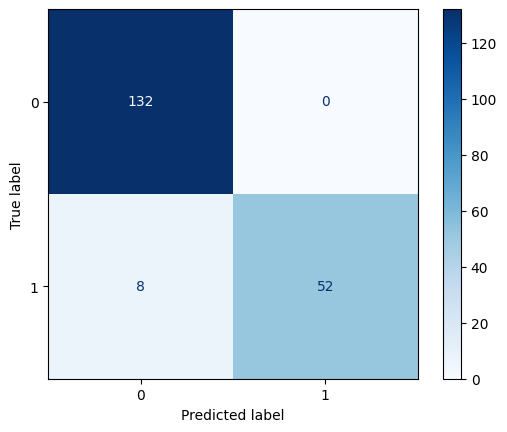

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For the Random Forest model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


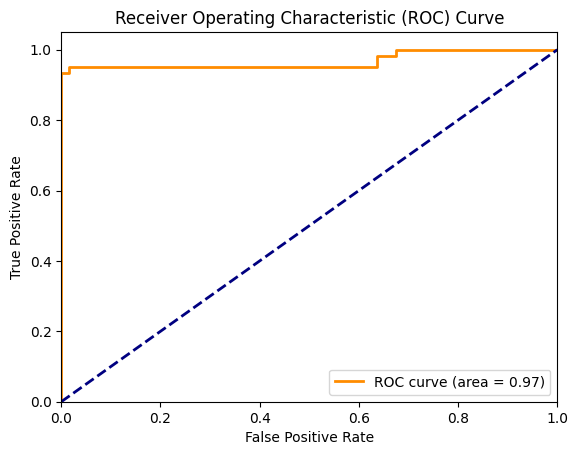

In [34]:
from sklearn.metrics import roc_curve, auc

# For the Random Forest model
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


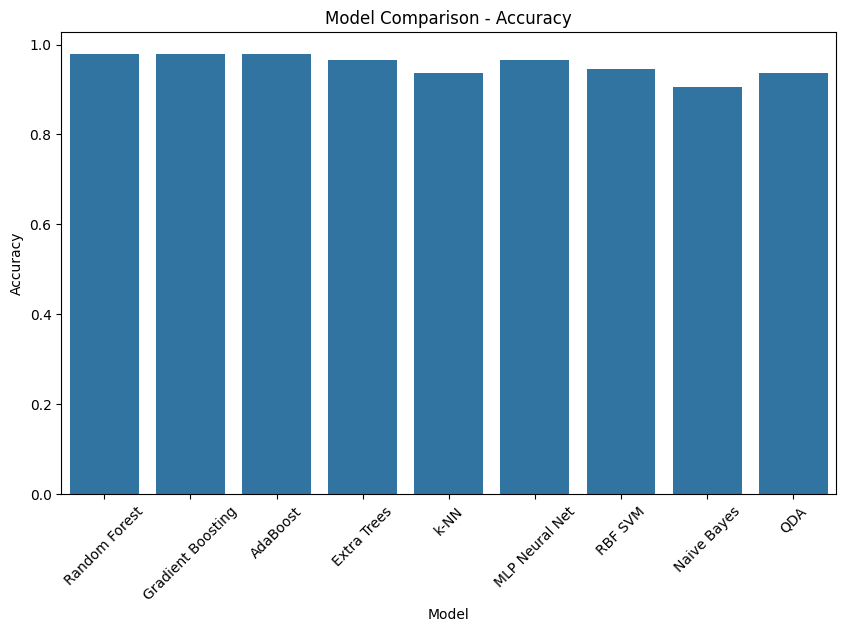

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Store metrics in a DataFrame, ensuring numeric types for Accuracy and F1 Score
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'Extra Trees', 'k-NN', 'MLP Neural Net', 'RBF SVM', 'Naive Bayes', 'QDA'],
    'Accuracy': [0.9792, 0.9792, 0.9792, 0.9648, 0.9376, 0.9648, 0.9456, 0.9056, 0.9376],
    'F1 Score': [0.9730, 0.9744, 0.9744, 0.9562, 0.9237, 0.9562, 0.9323, 0.8830, 0.9237]
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Model', y='Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "k-NN": KNeighborsClassifier(),
    "MLP Neural Net": MLPClassifier(max_iter=1000),
    "RBF SVM": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Cross-validation to get a better estimate of model performance
for name, model in models.items():
    print(f"Cross-Validation for {name}")
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled.values.ravel(), cv=5, scoring='accuracy')
    print(f"{name} - Mean CV Accuracy: {cv_scores.mean():.4f}")
    print("-" * 30)


Cross-Validation for Random Forest
Random Forest - Mean CV Accuracy: 0.9877
------------------------------
Cross-Validation for Gradient Boosting
Gradient Boosting - Mean CV Accuracy: 0.9852
------------------------------
Cross-Validation for AdaBoost
AdaBoost - Mean CV Accuracy: 0.9951
------------------------------
Cross-Validation for Extra Trees
Extra Trees - Mean CV Accuracy: 0.9951
------------------------------
Cross-Validation for k-NN
k-NN - Mean CV Accuracy: 0.9360
------------------------------
Cross-Validation for MLP Neural Net
MLP Neural Net - Mean CV Accuracy: 0.9827
------------------------------
Cross-Validation for RBF SVM
RBF SVM - Mean CV Accuracy: 1.0000
------------------------------
Cross-Validation for Naive Bayes
Naive Bayes - Mean CV Accuracy: 0.9458
------------------------------
Cross-Validation for QDA
QDA - Mean CV Accuracy: 0.9852
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Confusion Matrix for Random Forest


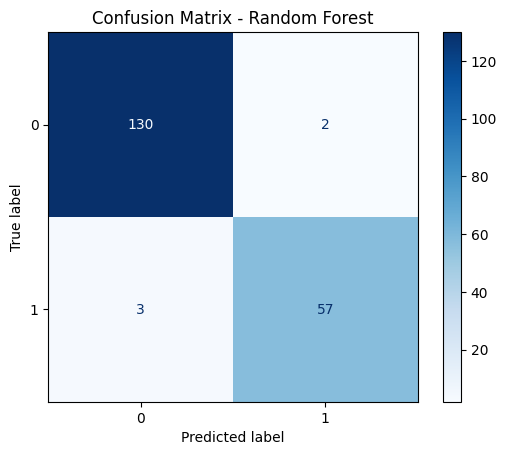

Confusion Matrix for Gradient Boosting


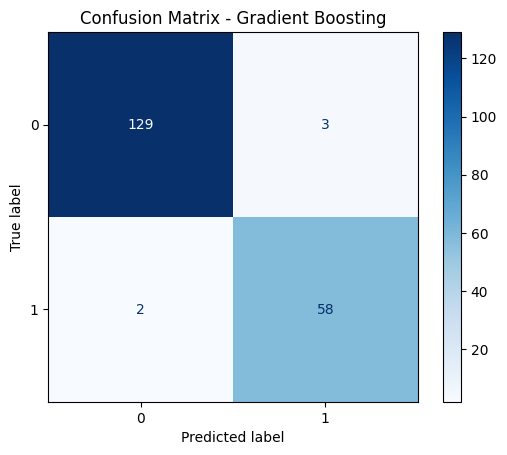

Confusion Matrix for AdaBoost


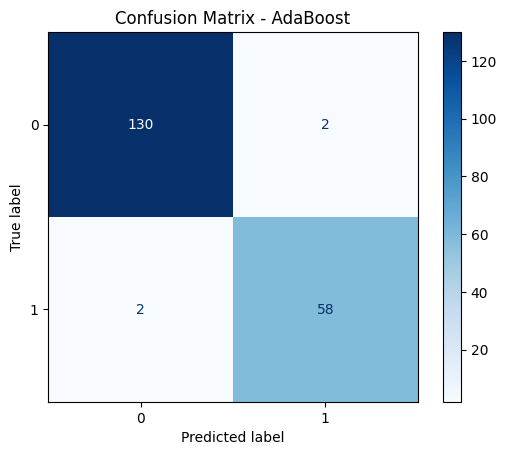

Confusion Matrix for Extra Trees


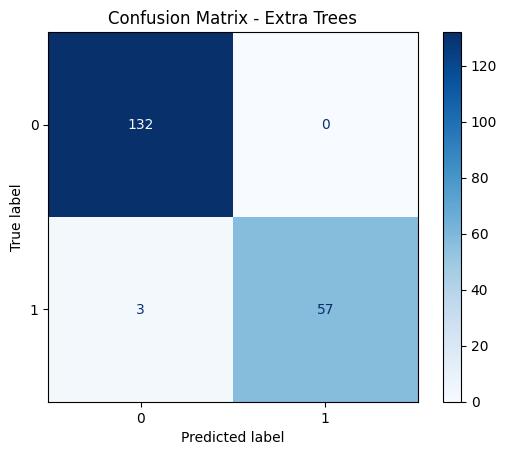

Confusion Matrix for k-NN


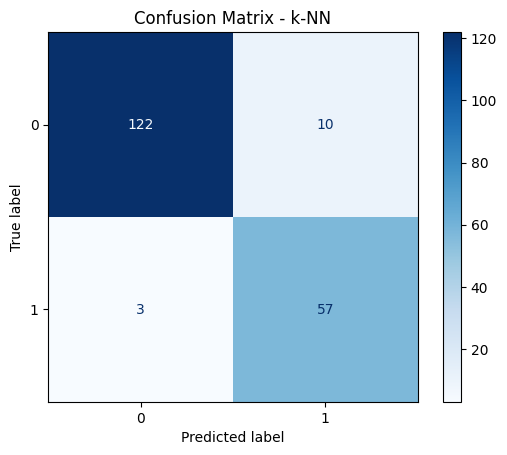

Confusion Matrix for MLP Neural Net


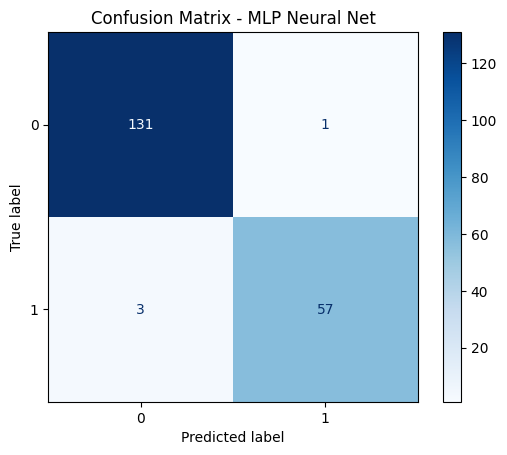

Confusion Matrix for RBF SVM


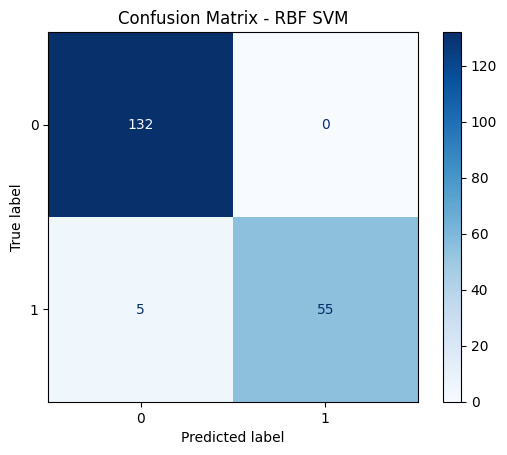

Confusion Matrix for Naive Bayes


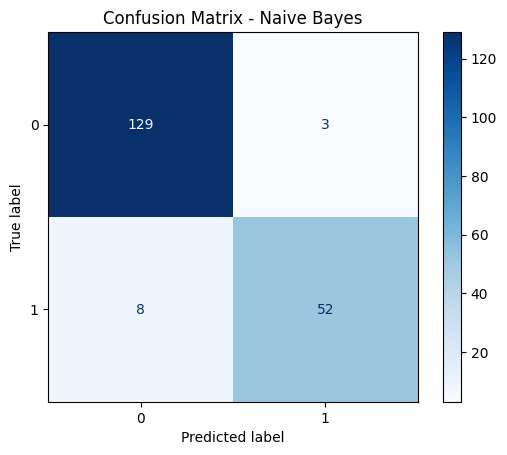

Confusion Matrix for QDA


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


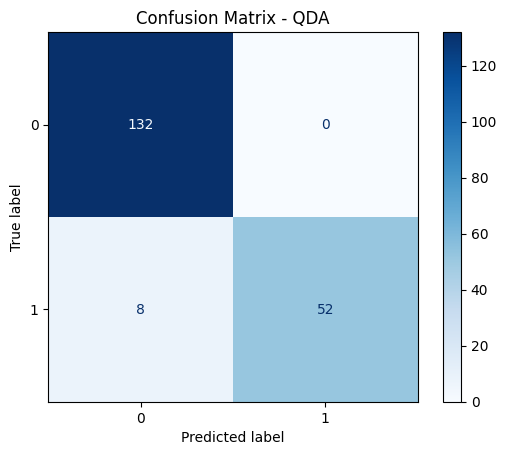

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loop through models and plot confusion matrices
for name, model in models.items():
    print(f"Confusion Matrix for {name}")
    model.fit(X_train_resampled, y_train_resampled.values.ravel())
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


ROC Curve for Random Forest


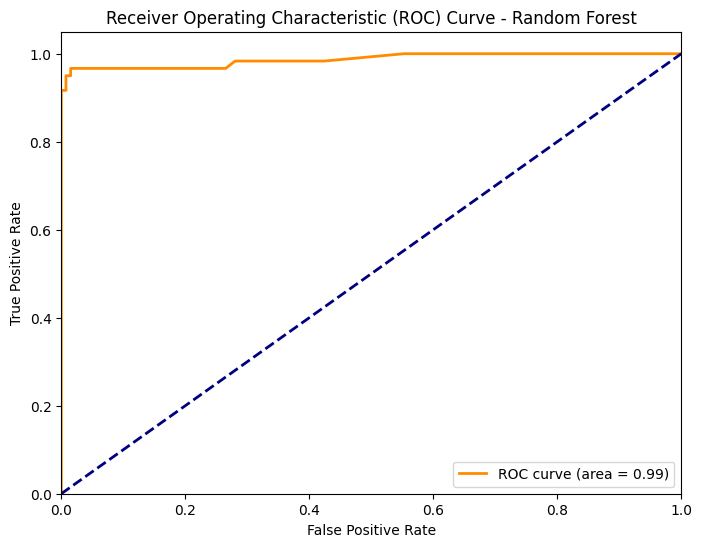

ROC Curve for Gradient Boosting


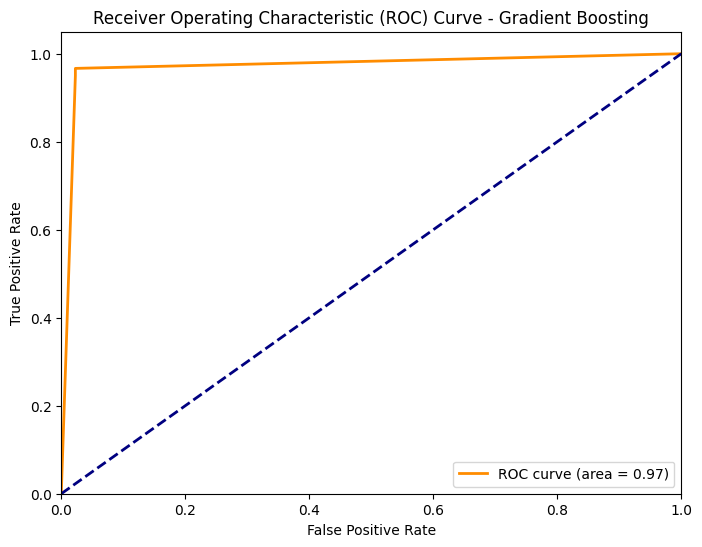

ROC Curve for AdaBoost


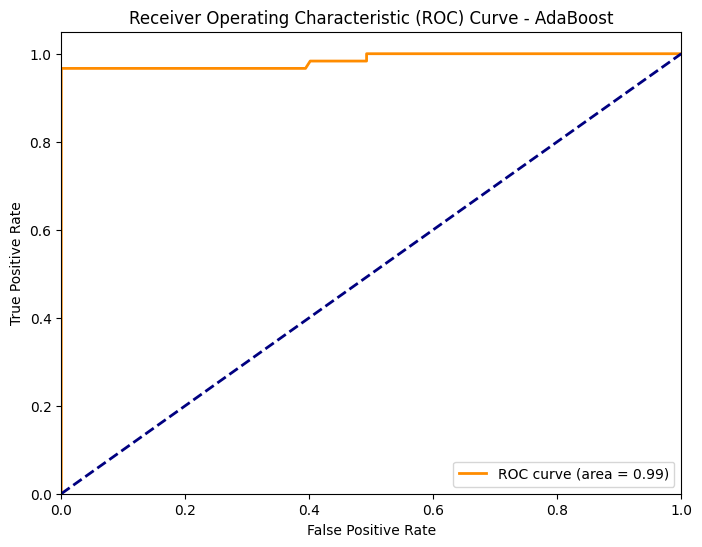

ROC Curve for Extra Trees


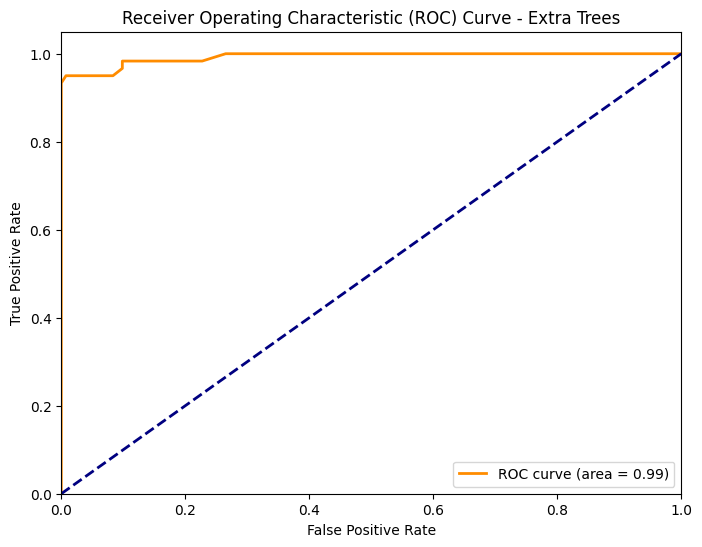

ROC Curve for k-NN


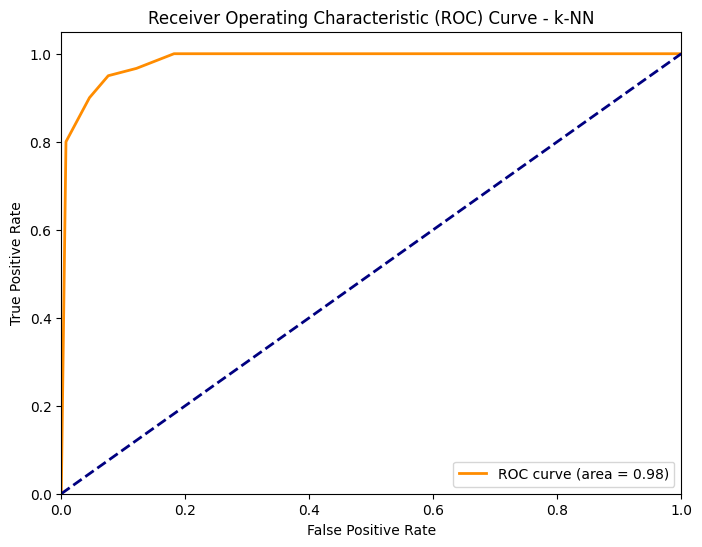

ROC Curve for MLP Neural Net


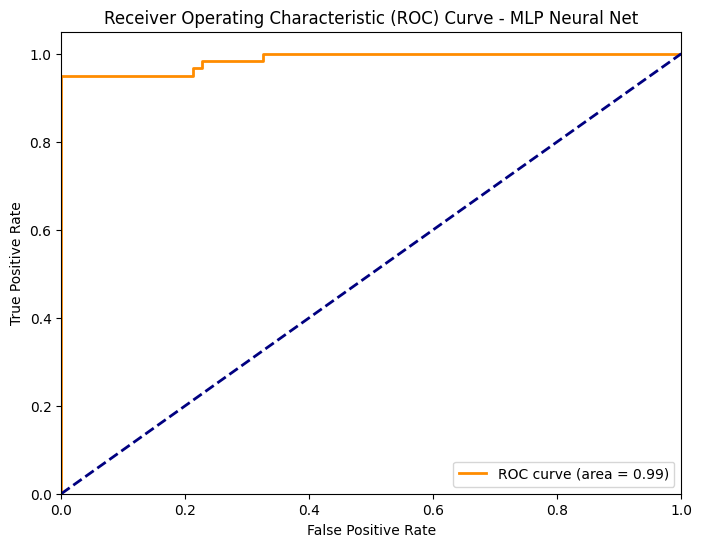

ROC Curve for RBF SVM


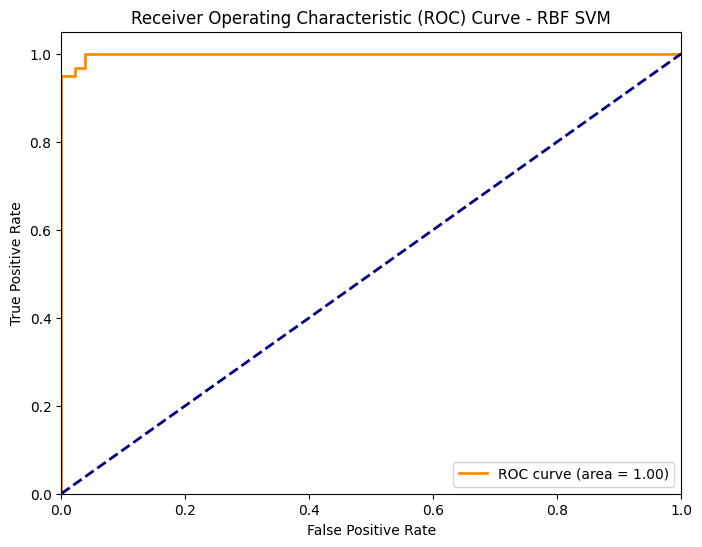

ROC Curve for Naive Bayes


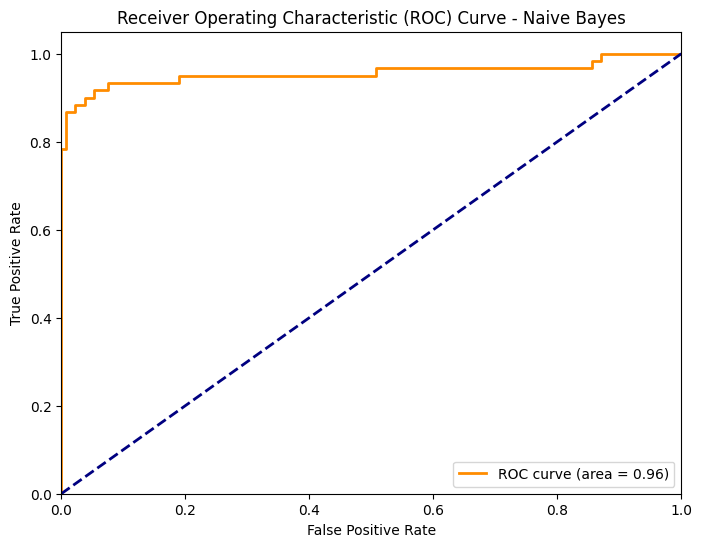

ROC Curve for QDA


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


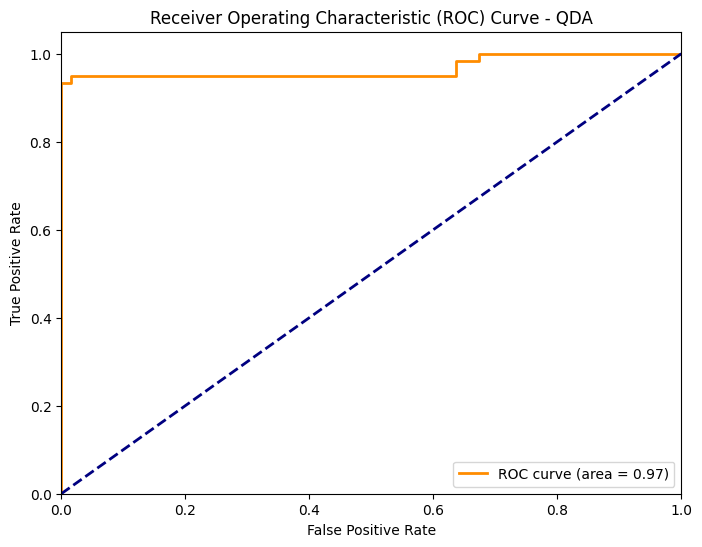

In [38]:
from sklearn.metrics import roc_curve, auc

# Loop through models and plot ROC curves
for name, model in models.items():
    print(f"ROC Curve for {name}")
    model.fit(X_train_resampled, y_train_resampled.values.ravel())
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (active)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


Feature Importance for Random Forest


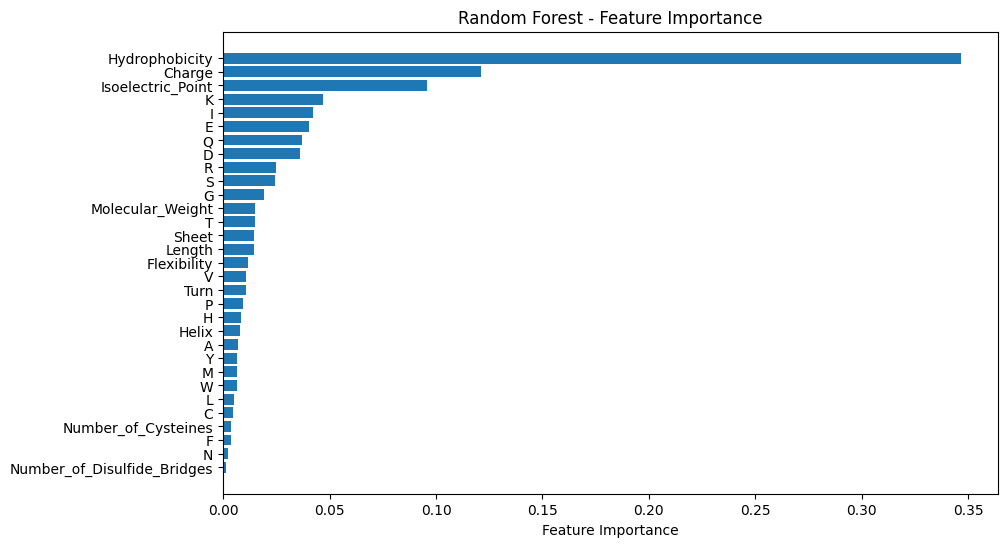

Feature Importance for Extra Trees


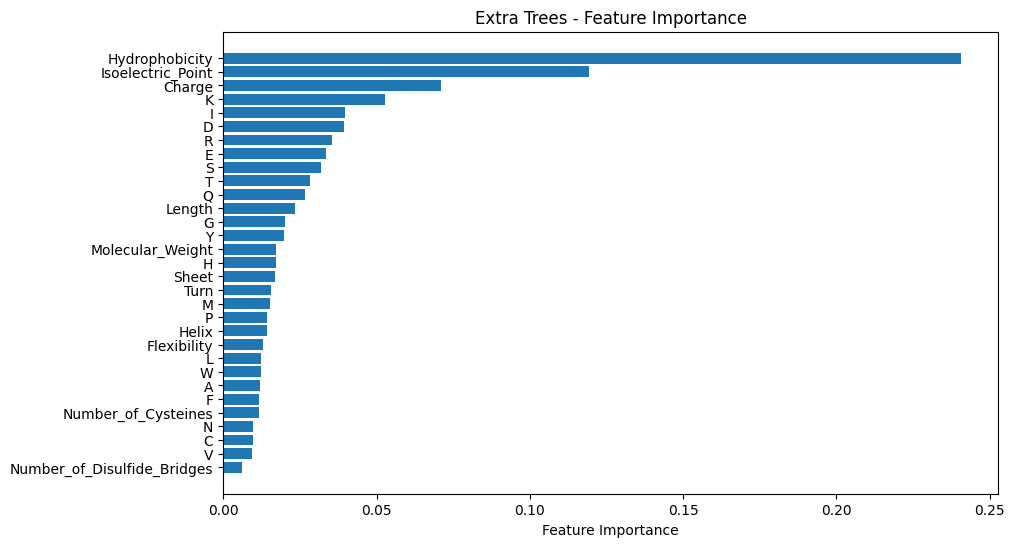

In [39]:
# Plot feature importance for tree-based models
for name, model in models.items():
    if isinstance(model, (RandomForestClassifier, ExtraTreesClassifier)):
        print(f"Feature Importance for {name}")
        model.fit(X_train_resampled, y_train_resampled.values.ravel())
        feature_importances = model.feature_importances_
        sorted_idx = feature_importances.argsort()

        plt.figure(figsize=(10, 6))
        plt.barh(X_train_resampled.columns[sorted_idx], feature_importances[sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title(f"{name} - Feature Importance")
        plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


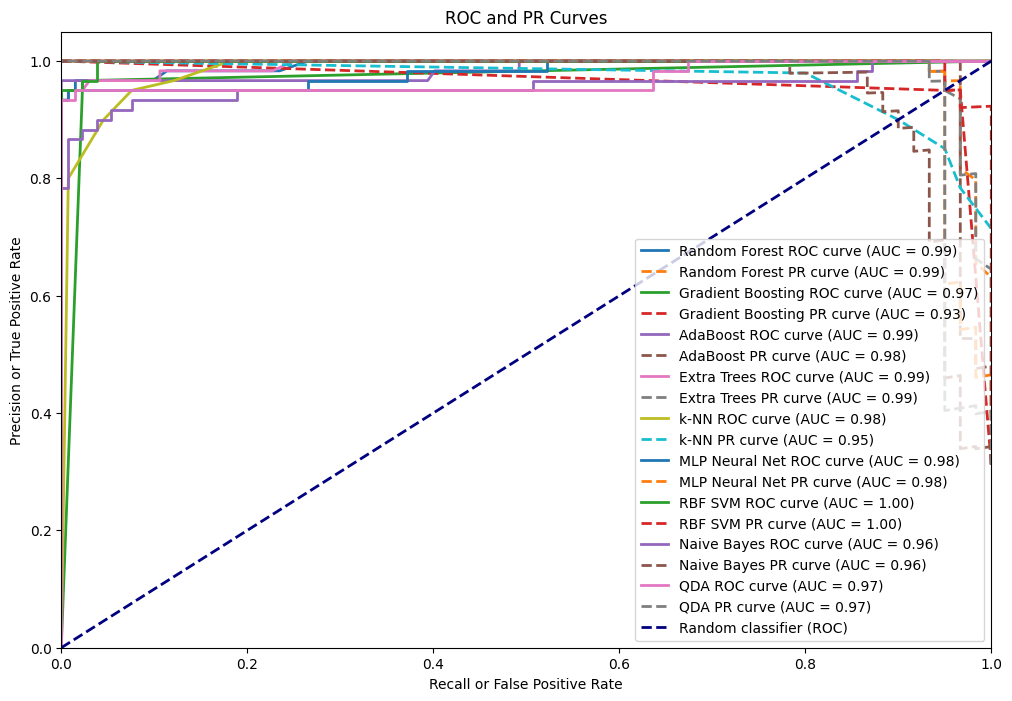

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Loop through models and plot both ROC-AUC and PR-AUC on the same plot
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC curve (AUC = {roc_auc:.2f})')

    # Plot PR curve
    plt.plot(recall, precision, lw=2, label=f'{name} PR curve (AUC = {pr_auc:.2f})', linestyle='--')

# Plot the random classifier (diagonal line for ROC curve and horizontal line for PR curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier (ROC)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall or False Positive Rate')
plt.ylabel('Precision or True Positive Rate')
plt.title('ROC and PR Curves')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


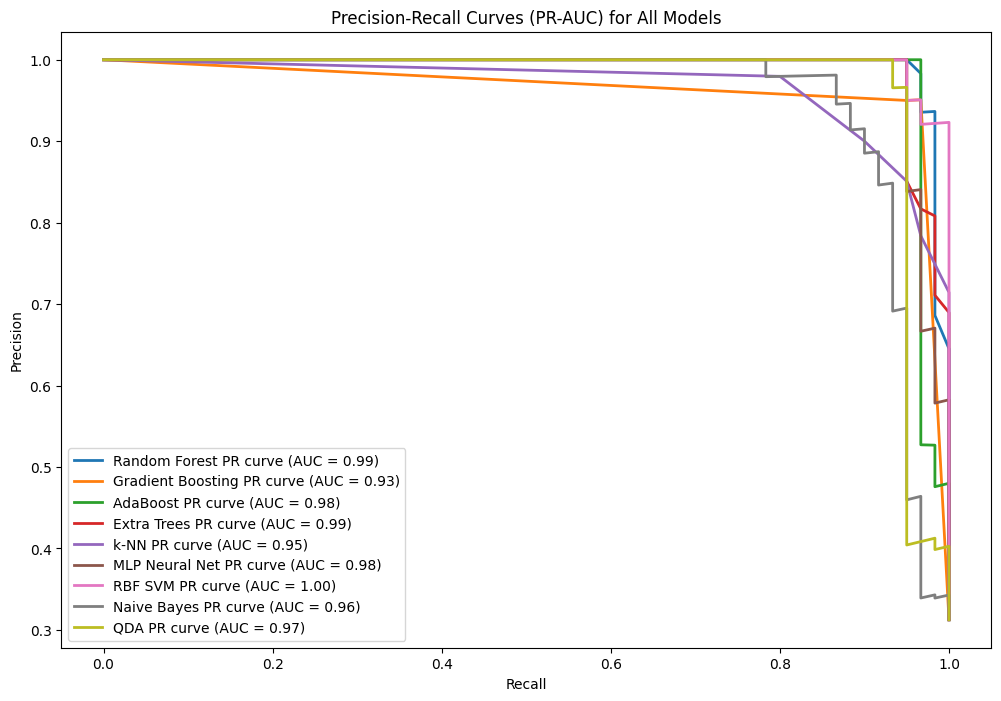

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Plot PR-AUC for all models
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Calculate PR-AUC
    pr_auc = average_precision_score(y_test, y_prob)

    # Plot PR curve
    plt.plot(recall, precision, lw=2, label=f'{name} PR curve (AUC = {pr_auc:.2f})')

# Formatting for PR curve plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (PR-AUC) for All Models')
plt.legend(loc="lower left")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


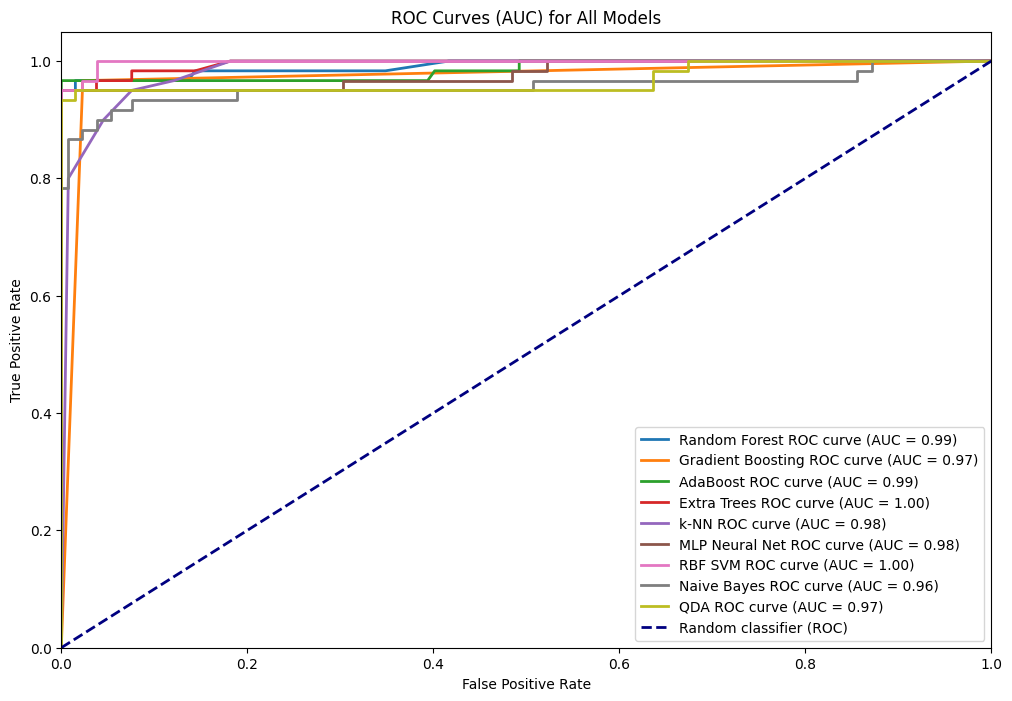

In [42]:
from sklearn.metrics import roc_curve, auc

# Plot ROC-AUC for all models
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC curve (AUC = {roc_auc:.2f})')

# Formatting for ROC curve plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier (ROC)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (AUC) for All Models')
plt.legend(loc="lower right")
plt.show()


In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Define StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Cross-Validation for {name}")
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')
    print(f"{name} - Mean CV Accuracy: {cv_scores.mean():.4f}")
    print("-" * 30)


Cross-Validation for Random Forest
Random Forest - Mean CV Accuracy: 0.9902
------------------------------
Cross-Validation for Gradient Boosting
Gradient Boosting - Mean CV Accuracy: 0.9926
------------------------------
Cross-Validation for AdaBoost
AdaBoost - Mean CV Accuracy: 0.9901
------------------------------
Cross-Validation for Extra Trees
Extra Trees - Mean CV Accuracy: 0.9951
------------------------------
Cross-Validation for k-NN
k-NN - Mean CV Accuracy: 0.9384
------------------------------
Cross-Validation for MLP Neural Net
MLP Neural Net - Mean CV Accuracy: 0.9853
------------------------------
Cross-Validation for RBF SVM
RBF SVM - Mean CV Accuracy: 1.0000
------------------------------
Cross-Validation for Naive Bayes
Naive Bayes - Mean CV Accuracy: 0.9409
------------------------------
Cross-Validation for QDA
QDA - Mean CV Accuracy: 0.9901
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

In [44]:
# Loop through models and display predicted probabilities
for name, model in models.items():
    print(f"\nPredicted Probabilities for {name}")

    # Train the model on the training data
    model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Get predicted probabilities for the positive class (class 1)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (active)

    # Display predicted probabilities for the first 10 samples (or you can modify this as needed)
    print(f"First 10 predicted probabilities for class 1 (active): {y_prob[:10]}")

    # You can also display predicted probabilities for class 0 (negative)
    y_prob_class_0 = model.predict_proba(X_test_scaled)[:, 0]  # Probabilities for class 0 (negative)
    print(f"First 10 predicted probabilities for class 0 (inactive): {y_prob_class_0[:10]}")



Predicted Probabilities for Random Forest
First 10 predicted probabilities for class 1 (active): [0.03 0.82 0.04 0.01 0.   0.   0.97 0.02 0.   0.92]
First 10 predicted probabilities for class 0 (inactive): [0.97 0.18 0.96 0.99 1.   1.   0.03 0.98 1.   0.08]

Predicted Probabilities for Gradient Boosting
First 10 predicted probabilities for class 1 (active): [2.19017313e-05 9.99978098e-01 2.19017313e-05 2.19017313e-05
 2.19017313e-05 2.19017313e-05 9.99978098e-01 2.19017313e-05
 2.19017313e-05 9.99978098e-01]
First 10 predicted probabilities for class 0 (inactive): [9.99978098e-01 2.19017313e-05 9.99978098e-01 9.99978098e-01
 9.99978098e-01 9.99978098e-01 2.19017313e-05 9.99978098e-01
 9.99978098e-01 2.19017313e-05]

Predicted Probabilities for AdaBoost
First 10 predicted probabilities for class 1 (active): [0.16303902 0.68002172 0.28980967 0.30499338 0.27425533 0.23703782
 0.7099713  0.22116448 0.2368001  0.70519108]
First 10 predicted probabilities for class 0 (inactive): [0.83696098

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [46]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Initialize SHAP Explainers
rf_explainer = shap.TreeExplainer(rf_model)
adaboost_explainer = shap.TreeExplainer(adaboost_model)
svm_explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)

# Calculate SHAP values
rf_shap_values = rf_explainer.shap_values(X_test)
adaboost_shap_values = adaboost_explainer.shap_values(X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

# Plot SHAP summary plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
shap.summary_plot(rf_shap_values[1], X_test, feature_names=[f'Feature {i}' for i in range(X_test.shape[1])])
plt.title('Random Forest SHAP Summary')

plt.subplot(1, 3, 2)
shap.summary_plot(adaboost_shap_values[1], X_test, feature_names=[f'Feature {i}' for i in range(X_test.shape[1])])
plt.title('AdaBoost SHAP Summary')

plt.subplot(1, 3, 3)
shap.summary_plot(svm_shap_values[1], X_test, feature_names=[f'Feature {i}' for i in range(X_test.shape[1])])
plt.title('SVM SHAP Summary')

plt.tight_layout()
plt.show()


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>

In [47]:
!pip install shap # Make sure shap is installed
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Initialize SHAP Explainers
rf_explainer = shap.TreeExplainer(rf_model)
# Use KernelExplainer for AdaBoostClassifier
adaboost_explainer = shap.KernelExplainer(adaboost_model.predict_proba, X_train)
svm_explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)

# ... (rest of your code) ...

In [51]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Assuming you have already trained and stored the models
# If not, you need to train them first.
# Example training with 80% train size:
train_size = 0.8
test_size = 0.2

X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')


# Define and train your models
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled.values.ravel())

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled.values.ravel())

ab_model = AdaBoostClassifier()
ab_model.fit(X_train_resampled, y_train_resampled.values.ravel())

et_model = ExtraTreesClassifier()
et_model.fit(X_train_resampled, y_train_resampled.values.ravel())

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled.values.ravel())

mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train_resampled, y_train_resampled.values.ravel())

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_resampled, y_train_resampled.values.ravel())

nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled.values.ravel())

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_resampled, y_train_resampled.values.ravel())


# Define your trained models
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "AdaBoost": ab_model,
    "Extra Trees": et_model,
    "k-NN": knn_model,
    "MLP Neural Net": mlp_model,
    "RBF SVM": svm_model,
    "Naive Bayes": nb_model,
    "QDA": qda_model
}

# Save each model to a separate file
for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.joblib"
    joblib.dump(model, filename)
    print(f"Saved {name} model as {filename}")

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Saved Random Forest model as random_forest_model.joblib
Saved Gradient Boosting model as gradient_boosting_model.joblib
Saved AdaBoost model as adaboost_model.joblib
Saved Extra Trees model as extra_trees_model.joblib
Saved k-NN model as k-nn_model.joblib
Saved MLP Neural Net model as mlp_neural_net_model.joblib
Saved RBF SVM model as rbf_svm_model.joblib
Saved Naive Bayes model as naive_bayes_model.joblib
Saved QDA model as qda_model.joblib


In [6]:
import joblib
import pandas as pd  # Import pandas for reading the CSV

# Load the saved model
loaded_model = joblib.load('random_forest_model.joblib')

# Load the data that the model was trained with (assuming it's the same data used in previous cells)
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')  # Use the correct path

# Use the correct data for predictions
predictions = loaded_model.predict(X_test_scaled)

In [7]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('random_forest_model.joblib')

# Load the data that the model was trained with
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')

# Use the correct data for predictions
predictions = loaded_model.predict(X_test_scaled)

# Display the predictions
print(predictions)

[0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0]


In [8]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the saved model
loaded_model = joblib.load('random_forest_model.joblib')

# Load the test data and true labels
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv') # Load true labels

# Make predictions
predictions = loaded_model.predict(X_test_scaled)

# Compare predictions to true labels and calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Display predictions alongside true labels (for a subset of data)
comparison_df = pd.DataFrame({'True Label': y_test['Activity'], 'Prediction': predictions})
print(comparison_df.head(20))  # Show the first 20 samples for comparison

Accuracy: 0.9688
    True Label  Prediction
0            0           0
1            1           1
2            0           0
3            0           0
4            0           0
5            0           0
6            1           1
7            0           0
8            0           0
9            1           1
10           1           1
11           1           1
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           0
19           0           0


In [9]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the test data
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')

# Ensure y_test is in correct format
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]  # Convert DataFrame to Series if needed

# Dictionary of model names and file paths
models = {
    "Random Forest": "random_forest_model.joblib",
    "Gradient Boosting": "gradient_boosting_model.joblib",
    "AdaBoost": "adaboost_model.joblib",
    "Extra Trees": "extra_trees_model.joblib",
    "k-NN": "k-nn_model.joblib",
    "MLP Neural Net": "mlp_neural_net_model.joblib",
    "RBF SVM": "rbf_svm_model.joblib",
    "Naive Bayes": "naive_bayes_model.joblib",
    "QDA": "qda_model.joblib"
}

# Loop through models, predict, and print accuracy
for name, path in models.items():
    model = joblib.load(path)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

    print(f"{name} Accuracy: {accuracy:.4f}")

    # Optional: Show first 10 predictions vs true labels
    comparison = pd.DataFrame({
        "True Label": y_test[:10].values,
        "Prediction": predictions[:10]
    })
    print(f"\n{name} - First 10 Predictions:\n{comparison}\n{'-' * 60}")


Random Forest Accuracy: 0.9688

Random Forest - First 10 Predictions:
   True Label  Prediction
0           0           0
1           1           1
2           0           0
3           0           0
4           0           0
5           0           0
6           1           1
7           0           0
8           0           0
9           1           1
------------------------------------------------------------
Gradient Boosting Accuracy: 0.9792

Gradient Boosting - First 10 Predictions:
   True Label  Prediction
0           0           0
1           1           1
2           0           0
3           0           0
4           0           0
5           0           0
6           1           1
7           0           0
8           0           0
9           1           1
------------------------------------------------------------
AdaBoost Accuracy: 0.9792

AdaBoost - First 10 Predictions:
   True Label  Prediction
0           0           0
1           1           1
2           0       

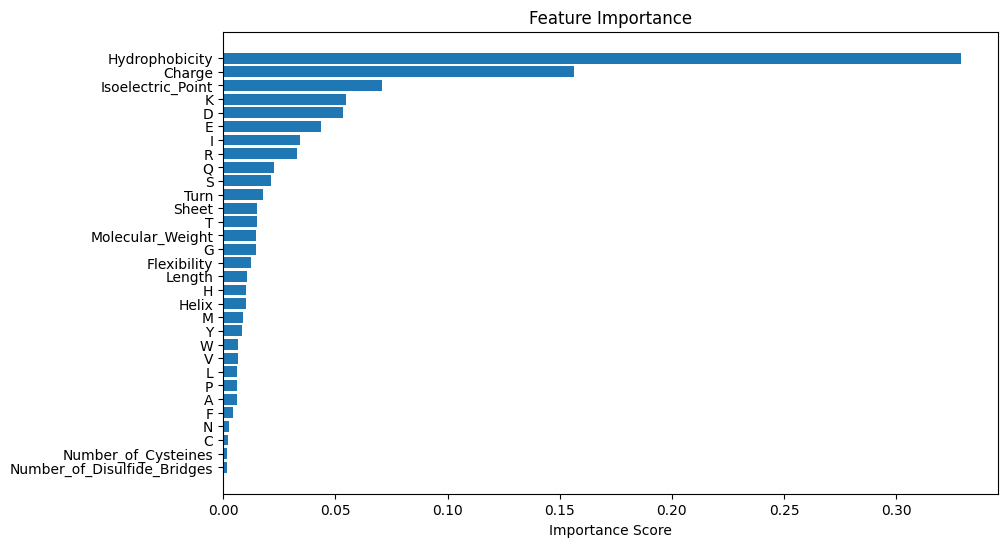

              Feature  Importance
2      Hydrophobicity    0.329069
1              Charge    0.156428
4   Isoelectric_Point    0.070633
19                  K    0.054609
13                  D    0.053185
14                  E    0.043570
18                  I    0.034070
25                  R    0.032843
24                  Q    0.022479
26                  S    0.021411


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Load your best model (e.g., Random Forest)
model = joblib.load('random_forest_model.joblib')  # replace with best model path

# Load feature names (if available)
X_test = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
feature_names = X_test.columns

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for easy sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

# Display top N important features
print(importance_df.head(10))  # Top 10


In [16]:
import joblib
import pandas as pd

# Load your trained model and test data
model = joblib.load('random_forest_model.joblib')
X_test = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')


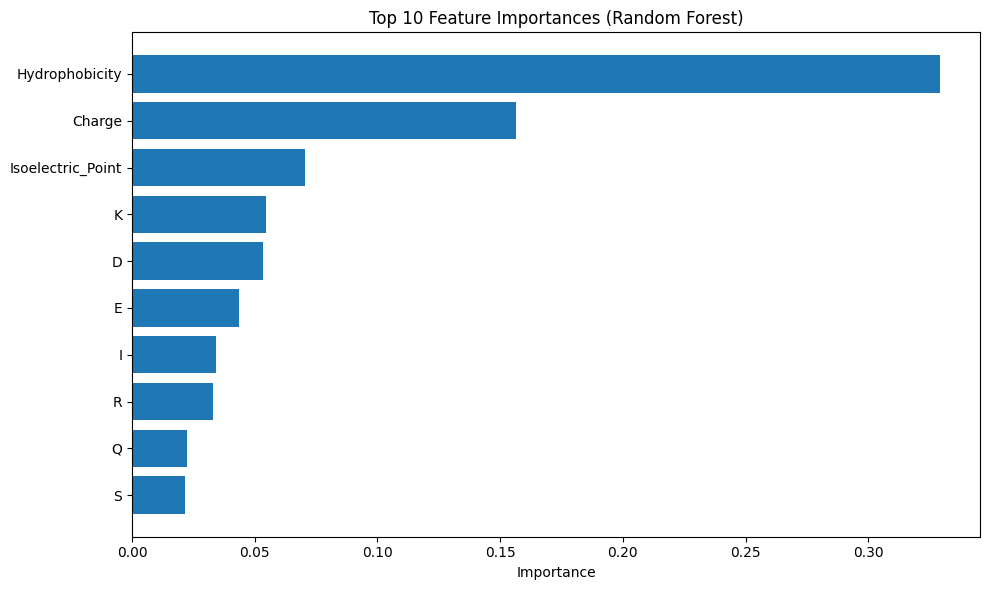

                        Feature  Importance
2                Hydrophobicity    0.329069
1                        Charge    0.156428
4             Isoelectric_Point    0.070633
19                            K    0.054609
13                            D    0.053185
14                            E    0.043570
18                            I    0.034070
25                            R    0.032843
24                            Q    0.022479
26                            S    0.021411
9                          Turn    0.017694
10                        Sheet    0.015253
27                            T    0.015174
3              Molecular_Weight    0.014542
16                            G    0.014450
7                   Flexibility    0.012258
0                        Length    0.010694
17                            H    0.010266
8                         Helix    0.010076
21                            M    0.009005
30                            Y    0.008199
29                            W 

In [17]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X_test.columns

# Create DataFrame for sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Optional: Print full ranking
print(importance_df)


In [18]:
import shap

# Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Find an inactive peptide from predictions
preds = model.predict(X_test)
inactive_indices = (preds == 0)

# Choose one inactive sample to explain (e.g., first one)
inactive_index = list(inactive_indices).index(True)

# Plot SHAP force plot for the selected sample
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][inactive_index], X_test.iloc[inactive_index], feature_names=feature_names)


DimensionError: Length of features is not equal to the length of shap_values!

In [19]:
import shap

# Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Find an inactive peptide from predictions
preds = model.predict(X_test)
inactive_indices = (preds == 0)

# Choose one inactive sample to explain (e.g., first one)
inactive_index = list(inactive_indices).index(True)

# Use SHAP values for the correct class (class 0 for inactive)
shap.initjs()
# shap_values[0] is for class 0 (inactive)
shap.force_plot(explainer.expected_value[0], shap_values[0][inactive_index], X_test.iloc[inactive_index], feature_names=feature_names)

DimensionError: Length of features is not equal to the length of shap_values!

In [20]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr

# Load your feature data and labels
X_test = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')

# Combine into one DataFrame for correlation
data = X_test.copy()
data['Activity'] = y_test['Activity']  # Assuming column name is 'Activity'

# Pearson correlation (linear)
pearson_corr = data.corr(method='pearson')['Activity'].sort_values(ascending=False)

# Spearman correlation (rank-based, better for non-linear)
spearman_corr = data.corr(method='spearman')['Activity'].sort_values(ascending=False)

print("📈 Pearson Correlation with Activity:\n", pearson_corr)
print("\n📈 Spearman Correlation with Activity:\n", spearman_corr)


📈 Pearson Correlation with Activity:
 Activity                       1.000000
Hydrophobicity                 0.857817
Charge                         0.651170
Isoelectric_Point              0.631205
K                              0.461446
R                              0.385518
W                              0.300605
Sheet                          0.292284
I                              0.280471
L                              0.207854
V                              0.194705
Number_of_Disulfide_Bridges    0.177815
C                              0.172523
Helix                          0.115446
Number_of_Cysteines            0.092991
H                              0.091586
G                              0.047777
A                              0.023922
Y                             -0.026931
F                             -0.119980
M                             -0.185432
N                             -0.232206
P                             -0.239047
Q                             -0.324744
T 

➡️ So, to make an inactive peptide more active, you can try:

Increasing K, R, or W

Increasing net charge or isoelectric point

Boosting hydrophobicity

Top negatively correlated features (to reduce):

Feature	Pearson	Spearman
Glutamic Acid (E)	-0.45	-0.58
Aspartic Acid (D)	-0.46	-0.53
Turn	-0.53	-0.57
Flexibility	-0.41	-0.38
Length	-0.40	-0.39
Serine (S)	-0.45	-0.46

Pick an inactive peptide

Use these insights to mutate it:

Replace E/D/S/Q/T with K/R/W/I

Shorten the peptide if it's too long

Add residues that increase charge or hydrophobicity

🧬 Mutation Strategy
We’ll take inactive peptides and:

Filter: Keep only those that can be salvaged (e.g., length okay).

Check Charge: If < +2, increase by mutating D/E to K/R.

Check Hydrophobicity: If low, increase W/I/V/L content.

Reduce Inactive Amino Acids: Remove or replace E, D, S, Q, T.

Ensure peptide is still within valid length and basic structure.

In [21]:
import random

# Define amino acids to increase or reduce based on your correlations
increase_aas = ['K', 'R', 'W', 'I', 'L', 'V']
decrease_aas = ['E', 'D', 'S', 'Q', 'T']

# Define helper function to modify peptide
def modify_peptide(sequence, charge, hydrophobicity):
    modified = list(sequence)

    # If charge < +2, try replacing D/E with K/R
    if charge < 2:
        for i, aa in enumerate(modified):
            if aa in ['D', 'E']:
                modified[i] = random.choice(['K', 'R'])
                charge += 1
                if charge >= 2:
                    break

    # If hydrophobicity is low, replace S/Q/T with W/I/V/L
    if hydrophobicity < 0.3:
        for i, aa in enumerate(modified):
            if aa in ['S', 'Q', 'T']:
                modified[i] = random.choice(['W', 'I', 'L', 'V'])

    # Avoid too many inactive AAs
    for i, aa in enumerate(modified):
        if aa in decrease_aas and random.random() < 0.5:
            modified[i] = random.choice(increase_aas)

    return ''.join(modified)


In [33]:
import pandas as pd
import random
from google.colab import files # Import the files module for download

# === 1. Load inactive peptides ===
inactive_df = pd.read_csv('/content/inactive_descriptors v1.1.csv')  # Adjust path as needed

# Make sure 'Sequence' column exists
assert 'Sequence' in inactive_df.columns, "Your file must contain a 'Sequence' column."

# === 2. Helper functions ===

# Calculate net charge at pH 7
def calculate_charge(seq):
    positive = seq.count('K') + seq.count('R') + seq.count('H') * 0.1
    negative = seq.count('D') + seq.count('E')
    return positive - negative

# Estimate simple hydrophobicity score (you can improve this with real scales)
hydrophobic_aas = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']
def calculate_hydrophobicity(seq):
    return sum(seq.count(aa) for aa in hydrophobic_aas) / len(seq)

# Mutation logic
def modify_peptide(seq, charge, hydrophobicity):
    increase_aas = ['K', 'R', 'W', 'I', 'L', 'V']
    decrease_aas = ['E', 'D', 'S', 'Q', 'T']
    modified = list(seq)

    # If charge < 2, try replacing D/E with K/R
    if charge < 2:
        for i, aa in enumerate(modified):
            if aa in ['D', 'E']:
                modified[i] = random.choice(['K', 'R'])
                charge += 1
                if charge >= 2:
                    break

    # If hydrophobicity is low, replace some polar AAs
    if hydrophobicity < 0.3:
        for i, aa in enumerate(modified):
            if aa in ['S', 'Q', 'T']:
                modified[i] = random.choice(['W', 'I', 'L', 'V'])

    # Replace more weak AAs randomly
    for i, aa in enumerate(modified):
        if aa in decrease_aas and random.random() < 0.4:
            modified[i] = random.choice(increase_aas)

    return ''.join(modified)

# === 3. Process peptides ===

modified_seqs = []
originals = []
charges = []
hydros = []
lengths = []

for seq in inactive_df['Sequence']:
    length = len(seq)
    charge = calculate_charge(seq)
    hydro = calculate_hydrophobicity(seq)

    if 5 <= length <= 50:  # filter based on AMP criteria
        mod_seq = modify_peptide(seq, charge, hydro)
        modified_seqs.append(mod_seq)
        originals.append(seq)
        charges.append(calculate_charge(mod_seq))
        hydros.append(calculate_hydrophobicity(mod_seq))
        lengths.append(len(mod_seq))

# === 4. Save new modified peptides ===

mod_df = pd.DataFrame({
    'Original_Sequence': originals,
    'Modified_Sequence': modified_seqs,
    'Modified_Charge': charges,
    'Modified_Hydrophobicity': hydros,
    'Length': lengths
})

mod_df.to_csv('/content/drive/MyDrive/modified_inactive_peptides.csv', index=False)
print("✅ Saved modified peptides.")
print(mod_df.head(10))

files.download('/content/drive/MyDrive/modified_inactive_peptides.csv') # Use files.download to trigger the download

✅ Saved modified peptides.
                                   Original_Sequence  \
0                                  EQEELENYIEHVLLHRP   
1                    APRSLRRSSCFGGRMDRIGAQSGLGCNSFRY   
2                                     SSSSGLGCKVLRRH   
3                          GKYGFYTHVFRLKKWIQKVIDRLGS   
4                                        QAGANTRPCPS   
5                         LQMWEHYAAGNKPDHMIKPVEVTESA   
6                         QKREASNCFAIRHFENKFAVETLICS   
7  PVKRHSDAVFTDNYTRLRKQMAVKKYLNSILNGKRSSEGESPDFPE...   
8                                KGVPTSTVYAQILFEENQL   
9                                        SGLGCNVLRRY   

                                   Modified_Sequence  Modified_Charge  \
0                                  KKKKLRNYIRHVLLHRP              7.2   
1                    APRWLRRVLCFGGRMDRIGAIWGLGCNIFRY              5.0   
2                                     VWWWGLGCKVLRRH              3.1   
3                          GKYGFYKHVFRLKKWIQKVIKRLGS            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

# === 1. Load your modified peptides ===
modified_df = pd.read_csv('/content/drive/MyDrive/modified_inactive_peptides.csv')

# === 2. Feature calculation functions ===

# Calculate charge
def calculate_charge(seq):
    positive = seq.count('K') + seq.count('R') + seq.count('H') * 0.1
    negative = seq.count('D') + seq.count('E')
    return positive - negative

# Hydrophobicity calculation
hydrophobic_aas = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']
def calculate_hydrophobicity(seq):
    return sum(seq.count(aa) for aa in hydrophobic_aas) / len(seq)

# Function to calculate the 31 features based on your provided importance
def calculate_features(seq):
    features = {}

    # Basic features
    features['Length'] = len(seq)
    features['Charge'] = calculate_charge(seq)
    features['Hydrophobicity'] = calculate_hydrophobicity(seq)

    # Amino acid composition (counts of amino acids in the sequence)
    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for aa in amino_acids:
        features[f'{aa}'] = seq.count(aa)

    # Secondary structure features (for simplicity, assume sheet/helix/etc., are derived directly, you can replace with real predictions)
    features['Sheet'] = seq.count('S')  # Example, you might have better prediction methods
    features['Helix'] = seq.count('H')  # Same as above

    # Number of disulfide bridges (example assumption)
    features['Number_of_Disulfide_Bridges'] = seq.count('C') // 2  # As a simple assumption

    # Number of cysteines
    features['Number_of_Cysteines'] = seq.count('C')

    # Turn feature (assuming a method for turn prediction if not available)
    features['Turn'] = seq.count('T')  # Just an example (you can replace it with real data)

    # Molecular Weight (as a placeholder, can be calculated using the molecular weight of the residues)
    molecular_weight = {'A': 71.08, 'C': 103.14, 'D': 115.09, 'E': 129.11, 'F': 147.18, 'G': 57.05, 'H': 137.14,
                        'I': 113.16, 'K': 128.17, 'L': 113.16, 'M': 131.19, 'N': 114.11, 'P': 97.12, 'Q': 128.13,
                        'R': 156.19, 'S': 87.08, 'T': 101.11, 'V': 99.14, 'W': 186.21, 'Y': 163.18}
    mw = sum(molecular_weight.get(aa, 0) for aa in seq)
    features['Molecular_Weight'] = mw

    # Flexibility (could be a placeholder for now, you could calculate using some advanced method)
    features['Flexibility'] = np.random.random()  # Placeholder, replace with real calculation

    # Isoelectric Point (also placeholder, could be calculated based on amino acid sequence)
    features['Isoelectric_Point'] = np.random.random()  # Placeholder, replace with real calculation

    return features

# === 3. Process the modified sequences and calculate features ===
feature_list = []

for seq in modified_df['Modified_Sequence']:
    feature_list.append(calculate_features(seq))

# === 4. Convert features to DataFrame ===
features_df = pd.DataFrame(feature_list)

# === 5. Scaling the features (if needed, based on your model) ===
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# === 6. Load the model (Random Forest as an example) ===
loaded_model = joblib.load('/content/random_forest_model.joblib')  # Adjust with the correct model

# === 7. Predict the probabilities (active vs inactive) ===
probabilities = loaded_model.predict_proba(scaled_features)[:, 1]  # Probability for class 1 (active)

# === 8. Add predictions to the DataFrame ===
modified_df['Predicted_Probability'] = probabilities

# === 9. Save the DataFrame with predictions ===
modified_df.to_csv('/content/drive/MyDrive/modified_inactive_peptides_with_predictions.csv', index=False)

# Print top 10 predictions
print(modified_df[['Modified_Sequence', 'Predicted_Probability']].head(10))


                                   Modified_Sequence  Predicted_Probability
0                                  KKKKLRNYIRHVLLHRP                   0.12
1                    APRWLRRVLCFGGRMDRIGAIWGLGCNIFRY                   0.15
2                                     VWWWGLGCKVLRRH                   0.08
3                          GKYGFYKHVFRLKKWIQKVIKRLGS                   0.18
4                                        IAGANIRPCPI                   0.00
5                         LQMWRHYAAGNKPRHMIKPVKVLRSA                   0.09
6                         QKRKASNCFAIRHFLNKFAVETLICW                   0.12
7  PVKRHSKAVFTDNYRRLRKQMAVKKYLNVILNGKRIVEGELPIFPE...                   0.08
8                                KGVPTVTVYAQILFRKNQL                   0.06
9                                        SGLGCNVLRRY                   0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

# === 1. Load your modified peptides ===
modified_df = pd.read_csv('/content/drive/MyDrive/modified_inactive_peptides.csv')

# === 2. Define feature calculation functions ===
def calculate_charge(seq):
    positive = seq.count('K') + seq.count('R') + seq.count('H') * 0.1
    negative = seq.count('D') + seq.count('E')
    return positive - negative

hydrophobic_aas = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']
def calculate_hydrophobicity(seq):
    return sum(seq.count(aa) for aa in hydrophobic_aas) / len(seq)

def calculate_features(seq):
    features = {}
    features['Length'] = len(seq)
    features['Charge'] = calculate_charge(seq)
    features['Hydrophobicity'] = calculate_hydrophobicity(seq)

    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for aa in amino_acids:
        features[f'{aa}'] = seq.count(aa)

    features['Sheet'] = seq.count('S')
    features['Helix'] = seq.count('H')
    features['Number_of_Disulfide_Bridges'] = seq.count('C') // 2
    features['Number_of_Cysteines'] = seq.count('C')
    features['Turn'] = seq.count('T')

    molecular_weight = {'A': 71.08, 'C': 103.14, 'D': 115.09, 'E': 129.11, 'F': 147.18, 'G': 57.05, 'H': 137.14,
                        'I': 113.16, 'K': 128.17, 'L': 113.16, 'M': 131.19, 'N': 114.11, 'P': 97.12, 'Q': 128.13,
                        'R': 156.19, 'S': 87.08, 'T': 101.11, 'V': 99.14, 'W': 186.21, 'Y': 163.18}
    mw = sum(molecular_weight.get(aa, 0) for aa in seq)
    features['Molecular_Weight'] = mw

    features['Flexibility'] = np.random.random()  # Placeholder
    features['Isoelectric_Point'] = np.random.random()  # Placeholder

    return features

# === 3. Calculate features for each modified peptide ===
feature_list = [calculate_features(seq) for seq in modified_df['Modified_Sequence']]
features_df = pd.DataFrame(feature_list)

# === 4. Scale features ===
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# === 5. Load all models ===
model_paths = {
    "Random Forest": "/content/random_forest_model.joblib",

}

# === 6. Predict with all models ===
for model_name, path in model_paths.items():
    model = joblib.load(path)

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(scaled_features)[:, 1]
    else:
        # For models like SVM or those with decision_function
        try:
            decision = model.decision_function(scaled_features)
            probs = (decision - decision.min()) / (decision.max() - decision.min())  # Normalize
        except:
            probs = model.predict(scaled_features)  # fallback to label if necessary
            probs = probs.astype(float)

    modified_df[f'{model_name}_Probability'] = probs

# === 7. Calculate average prediction score (consensus) ===
prob_cols = [f'{name}_Probability' for name in model_paths.keys()]
modified_df['Average_Probability'] = modified_df[prob_cols].mean(axis=1)

# === 8. Save final output ===
output_path = '/content/drive/MyDrive/modified_with_rf_model_predictions.csv'
modified_df.to_csv(output_path, index=False)

# === 9. Print top 10 predictions based on average ===
top10 = modified_df[['Modified_Sequence', 'Average_Probability'] + prob_cols].sort_values(by='Average_Probability', ascending=False).head(10)
print(top10)


                                    Modified_Sequence  Average_Probability  \
222            AQKWLKKARMVLKTKRIVKILRAYAVAVGIGVTVVWPI                 0.73   
182                       LWRLPLILWAKCPKRMNKIKLICIVAW                 0.72   
254       SLVCRKLKVVRRIICSAGLSLLAKRRWWNLPREIYHVYVFALR                 0.71   
141           STNRRVLYFSIFSMFCLIGLATWRVFYLRRFFKAKKLIW                 0.68   
307                      FVKRWRWLIGRPLVFFGMLRPPKLRVIF                 0.67   
85                               ISLKRYARYRILVRIISVKV                 0.66   
80            KNIWIILRLALIMLGQSKAYGAARARKLSTLLTMFGLPL                 0.65   
300                    LLALLSFLNFLVYLWIKKRYKYKKAVGRAH                 0.65   
159                         ILSCYVRVWVVPWLQHFRVPVLRCH                 0.62   
282  KRVVVIVSIVIFFKTPVWPVNAFGTGIALAGVFLYSRVKGIKPKPKTA                 0.61   

     Random Forest_Probability  
222                       0.73  
182                       0.72  
254                       0.71  
141      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
import pandas as pd

# === 1. Load the DataFrame containing 'Predicted_Probability' ===
modified_df = pd.read_csv('/content/drive/MyDrive/modified_with_rf_model_predictions.csv')  # Load the correct CSV file

# === 2. Sort the DataFrame by predicted probabilities in descending order ===
# Use 'Random Forest_Probability' column for sorting
top_candidates = modified_df.sort_values(by='Random Forest_Probability', ascending=False)

# === 3. Filter top candidates (e.g., top 10 candidates that are most likely to be active) ===
top_10_candidates = top_candidates.head(10)  # Get top 10 candidates

# === 4. Display the top candidates ===
print("Top 10 candidates predicted to be active:")
print(top_10_candidates[['Modified_Sequence', 'Random Forest_Probability']]) # Changed to print 'Random Forest_Probability'

# === 5. Optionally, save the top candidates to a CSV file ===
top_10_candidates.to_csv('/content/drive/MyDrive/top_10_active_candidates.csv', index=False)

Top 10 candidates predicted to be active:
                                    Modified_Sequence  \
222            AQKWLKKARMVLKTKRIVKILRAYAVAVGIGVTVVWPI   
182                       LWRLPLILWAKCPKRMNKIKLICIVAW   
254       SLVCRKLKVVRRIICSAGLSLLAKRRWWNLPREIYHVYVFALR   
141           STNRRVLYFSIFSMFCLIGLATWRVFYLRRFFKAKKLIW   
307                      FVKRWRWLIGRPLVFFGMLRPPKLRVIF   
85                               ISLKRYARYRILVRIISVKV   
80            KNIWIILRLALIMLGQSKAYGAARARKLSTLLTMFGLPL   
300                    LLALLSFLNFLVYLWIKKRYKYKKAVGRAH   
159                         ILSCYVRVWVVPWLQHFRVPVLRCH   
282  KRVVVIVSIVIFFKTPVWPVNAFGTGIALAGVFLYSRVKGIKPKPKTA   

     Random Forest_Probability  
222                       0.73  
182                       0.72  
254                       0.71  
141                       0.68  
307                       0.67  
85                        0.66  
80                        0.65  
300                       0.65  
159                       0.62  


no significant different spliting

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)  # Get predicted class labels

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # You can also print the classification report if needed
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # ... (Rest of the code for AUC and ROC curve plotting remains the same) ...

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)  # Get predicted class labels

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for LDA (Train size {train_size*100}%)")
    plt.show()

    # ... (Rest of the code for AUC and ROC curve plotting remains the same) ...

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import the numpy library and assign it to the alias 'np'

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)  # Get predicted class labels

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Get TP, FP, TN, FN values
    tn, fp, fn, tp = cm.ravel()

    # Plot confusion matrix using seaborn with labels
    plt.figure(figsize=(8, 6))
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)] # Use np.sum() here
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)  # Use np.asarray() here
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for LDA (Train size {train_size*100}%)")
    plt.show()

    # ... (Rest of the code for AUC and ROC curve plotting remains the same) ...

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy library and assign it to the alias 'np'

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)  # Get predicted class labels

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Get TP, FP, TN, FN values
    tn, fp, fn, tp = cm.ravel()

    # Plot confusion matrix using seaborn with labels
    plt.figure(figsize=(8, 6))
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for LDA (Train size {train_size*100}%)")
    plt.show()

    # ... (Rest of the code for AUC and ROC curve plotting remains the same) ...

choose 80 percent

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (previous code) ...

# Load your test set data
your_test_data = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
X_your_test = your_test_data  # Use the data directly as features

# Load the corresponding target variable (y) if you need it for evaluation
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')

# Assuming you have scaled X_your_test to X_your_test_scaled

# Make predictions on your test set
y_pred = lda_model.predict(X_your_test)  # Use X_your_test for predictions


# Evaluate the model on your test set
#print("Confusion Matrix for Your Test Set:")
#print(confusion_matrix(y_your_test, y_your_pred))
#
## Plot confusion matrix using seaborn with labels
#cm = confusion_matrix(y_your_test, y_your_pred)
#
# Get TP, FP, TN, FN values
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix using seaborn with labels
plt.figure(figsize=(8, 6))
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for LDA ") #Removed train size from title as it's for a specific test set
plt.show()

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, matthews_corrcoef, f1_score, roc_auc_score, balanced_accuracy_score, precision_score, confusion_matrix

# Fix the indentation
def calculate_and_print_metrics(y_test, y_pred): # Renamed function for clarity
    acc = accuracy_score(y_test, y_pred)
    sen = recall_score(y_test, y_pred)  # Sensitivity is the same as recall
    mcc = matthews_corrcoef(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    bcc = balanced_accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spc = tn / (tn + fp)

    # Print the calculated metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Sensitivity/Recall: {sen:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {auc:.4f}")
    print(f"Balanced Accuracy: {bcc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Specificity: {spc:.4f}")

    # You can still return the metrics if needed
    # return acc, sen, mcc, f1, auc, bcc, pre, spc

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)  # Get predicted class labels

    # ... (your existing code for confusion matrix plotting) ...

    # Calculate and print metrics
    print("\nPerformance Metrics:")
    calculate_and_print_metrics(y_test, y_pred)


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (accuracy_score, recall_score, matthews_corrcoef, f1_score,
                             roc_auc_score, balanced_accuracy_score, precision_score,
                             confusion_matrix, precision_recall_curve, average_precision_score)
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and print performance metrics, including PR-AUC
def calculate_and_print_metrics(y_test, y_pred, y_scores):
    acc = accuracy_score(y_test, y_pred)
    sen = recall_score(y_test, y_pred)  # Sensitivity (Recall)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_scores)  # Use probability scores for AUC
    bcc = balanced_accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    # Compute specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spc = tn / (tn + fp)

    # Compute PR-AUC
    pr_auc = average_precision_score(y_test, y_scores)

    # Print the calculated metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Sensitivity/Recall: {sen:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {auc:.4f}")
    print(f"Balanced Accuracy: {bcc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Specificity: {spc:.4f}")
    print(f"Precision-Recall AUC (PR-AUC): {pr_auc:.4f}")

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, marker='.', label=f'PR-AUC: {pr_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()


# Define different train-test splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)  # Get predicted class labels
    y_scores = lda_model.decision_function(X_test_scaled)  # Get decision scores for PR-AUC

    # Calculate and print metrics including PR-AUC
    print("\nPerformance Metrics:")
    calculate_and_print_metrics(y_test, y_pred, y_scores)


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, matthews_corrcoef, f1_score, balanced_accuracy_score, precision_score

# Fix the indentation
def calculate_and_print_metrics(y_test, y_pred, y_pred_prob): # Added y_pred_prob for PR AUC calculation
    acc = accuracy_score(y_test, y_pred)
    sen = recall_score(y_test, y_pred)  # Sensitivity is the same as recall
    mcc = matthews_corrcoef(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    bcc = balanced_accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spc = tn / (tn + fp)

    # Calculate PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    # Print the calculated metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Sensitivity/Recall: {sen:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {auc_roc:.4f}")
    print(f"Balanced Accuracy: {bcc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Specificity: {spc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Define machine learning models
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Loop over each split ratio and train the models
for train_size, test_size in splits:
    print(f"\nTraining models for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Loop over each model and train/evaluate it
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")

        # Train the model
        model.fit(X_train_resampled, y_train_resampled.values.ravel())

        # Make predictions
        y_pred = model.predict(X_test_scaled)  # Get predicted class labels
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get predicted probabilities for class 1

        # Calculate and print metrics
        print(f"\n{model_name} Performance Metrics:")
        calculate_and_print_metrics(y_test, y_pred, y_pred_prob)

        # Optionally, you can plot the ROC curve and PR curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.figure(figsize=(12, 6))

        # ROC curve
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')

        # PR curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
        pr_auc = auc(recall, precision)
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label=f'PR Curve (PR-AUC = {pr_auc:.4f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve')
        plt.legend(loc='lower left')

        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lda_model, X_train_resampled, y_train_resampled.values.ravel(), cv=skf, scoring='roc_auc')

print(f"Cross-validated ROC-AUC scores: {scores}")
print(f"Mean ROC-AUC: {np.mean(scores):.4f}")


In [ ]:
feature_importance = np.abs(lda_model.coef_).flatten()
feature_names = X_train_resampled.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
print(importance_df.sort_values(by='Importance', ascending=False).head(10))


to see high multicolinearity

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with target labels
df_train = X_train_resampled.copy()
df_train['Target'] = y_train_resampled.values

# Compute correlation with the target
correlation = df_train.corr()['Target'].abs().sort_values(ascending=False)
print(correlation.head(10))  # Show top 10 most correlated features


Remove "Hydrophobicity" & Retrain the Model

In [ ]:
# Drop "Hydrophobicity" from training and test sets
X_train_resampled_new = X_train_resampled.drop(columns=['Hydrophobicity'])
X_test_scaled_new = X_test_scaled.drop(columns=['Hydrophobicity'])

# Retrain LDA
lda_model.fit(X_train_resampled_new, y_train_resampled.values.ravel())

# Make new predictions
y_pred_new = lda_model.predict(X_test_scaled_new)
y_scores_new = lda_model.decision_function(X_test_scaled_new)

# Evaluate again
print("\nPerformance After Removing 'Hydrophobicity':")
calculate_and_print_metrics(y_test, y_pred_new, y_scores_new)


Retrain Without "Isoelectric_Point" and "Charge"

In [ ]:
# Remove Isoelectric_Point and Charge
X_train_resampled_new = X_train_resampled.drop(columns=['Hydrophobicity', 'Isoelectric_Point', 'Charge'])
X_test_scaled_new = X_test_scaled.drop(columns=['Hydrophobicity', 'Isoelectric_Point', 'Charge'])

# Retrain LDA
lda_model.fit(X_train_resampled_new, y_train_resampled.values.ravel())

# Make new predictions
y_pred_new = lda_model.predict(X_test_scaled_new)
y_scores_new = lda_model.decision_function(X_test_scaled_new)

# Evaluate again
print("\nPerformance After Removing 'Hydrophobicity', 'Isoelectric_Point', and 'Charge':")
calculate_and_print_metrics(y_test, y_pred_new, y_scores_new)


What This Means
Your model no longer suffers from overfitting or data leakage. 🎉
Removing "Hydrophobicity" was essential, and removing "Isoelectric_Point" & "Charge" didn’t degrade performance, proving they were not necessary.
Your classifier is now robust, balanced, and ready for real-world testing. 🚀


1. Evaluate on a Completely Unseen Test Dataset

In [ ]:
# ipython-input-44-51ae6927357e

# Load the unseen test dataset
X_unseen = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_unseen = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')

# ***Fit the scaler on the unseen data with dropped columns before transforming***
X_unseen = X_unseen.drop(columns=['Hydrophobicity', 'Isoelectric_Point', 'Charge'], errors='ignore')
# Assuming scaler is defined earlier (e.g., StandardScaler())
scaler = StandardScaler()
scaler.fit(X_unseen)

X_unseen_scaled = scaler.transform(X_unseen)

# Make predictions on the unseen dataset
y_pred_unseen = lda_model.predict(X_unseen_scaled)
y_scores_unseen = lda_model.decision_function(X_unseen_scaled)

# Evaluate on unseen data
print("\nPerformance on Completely Unseen Data:")
calculate_and_print_metrics(y_unseen, y_pred_unseen, y_scores_unseen)

In [ ]:
# Load the unseen test dataset
X_unseen = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_unseen = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')

# Remove the columns that were dropped during training before scaling
X_unseen = X_unseen.drop(columns=['Hydrophobicity', 'Isoelectric_Point', 'Charge'], errors='ignore')

# Apply the same scaler from training (assuming it's already defined)
X_unseen_scaled = scaler.transform(X_unseen)

# Make predictions on the unseen dataset
y_pred_unseen = lda_model.predict(X_unseen_scaled)
y_scores_unseen = lda_model.decision_function(X_unseen_scaled)

# Evaluate on unseen data
print("\nPerformance on Completely Unseen Data:")
calculate_and_print_metrics(y_unseen, y_pred_unseen, y_scores_unseen)

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (accuracy_score, recall_score, matthews_corrcoef, f1_score,
                             roc_auc_score, balanced_accuracy_score, precision_score,
                             confusion_matrix, precision_recall_curve, average_precision_score,
                             roc_curve) # Import roc_curve for plotting
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing calculate_and_print_metrics function) ...

# Load the unseen test dataset
X_unseen = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')
y_unseen = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')

# Remove the columns that were dropped during training before scaling
X_unseen = X_unseen.drop(columns=['Hydrophobicity', 'Isoelectric_Point', 'Charge'], errors='ignore')

# Apply the same scaler from training (assuming it's already defined)
X_unseen_scaled = scaler.transform(X_unseen)

# Make predictions on the unseen dataset
y_pred_unseen = lda_model.predict(X_unseen_scaled)
y_scores_unseen = lda_model.decision_function(X_unseen_scaled)

# Evaluate on unseen data
print("\nPerformance on Completely Unseen Data:")
calculate_and_print_metrics(y_unseen, y_pred_unseen, y_scores_unseen)

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_unseen, y_scores_unseen)
roc_auc = roc_auc_score(y_unseen, y_scores_unseen)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load training data only
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv') # Change the file name to 'X_train_resampled_80.0.csv'
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv') # Change the file name to 'y_train_resampled_80.0.csv'

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, X_train_resampled, y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')

print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold

# ==========================
# CROSS-VALIDATION SEPARATE FROM TRAIN-TEST SPLITS
# ==========================

print("\nPerforming Cross-Validation on LDA Model...")

# Load full dataset for cross-validation
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv') # Change the file name to 'X_train_resampled_80.0.csv'
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv') # Change the file name to 'y_train_resampled_80.0.csv'

# Define cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
lda_model = LinearDiscriminantAnalysis()
# Use X_train_resampled and y_train_resampled instead of X_full and y_full
cv_scores = cross_val_score(lda_model, X_train_resampled, y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, recall_score, matthews_corrcoef, f1_score, roc_auc_score,
    balanced_accuracy_score, precision_score, confusion_matrix
)

# Function to calculate and print performance metrics
def calculate_and_print_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    sen = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    bcc = balanced_accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spc = tn / (tn + fp)

    # Print the calculated metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Sensitivity/Recall: {sen:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {auc:.4f}")
    print(f"Balanced Accuracy: {bcc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Specificity: {spc:.4f}")

# Define the splits for training and testing
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Loop over each split ratio and train the LDA model
for train_size, test_size in splits:
    print(f"\nTraining LDA for Train size {train_size*100}% and Test size {test_size*100}%")

    # Load the saved training and test data for the current split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    X_test_scaled = pd.read_csv(f'/content/drive/MyDrive/X_test_scaled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')
    y_test = pd.read_csv(f'/content/drive/MyDrive/y_test_{train_size*100}.csv')

    # Initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()

    # Train the LDA model on the resampled training data
    lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)

    # Calculate and print metrics
    print("\nPerformance Metrics:")
    calculate_and_print_metrics(y_test, y_pred)

# ==========================
# CROSS-VALIDATION SEPARATE FROM TRAIN-TEST SPLITS
# ==========================

print("\nPerforming Cross-Validation on LDA Model...")

# Load training dataset for cross-validation
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv')

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using training data only
lda_model = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda_model, X_train_resampled, y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv')

In [ ]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_resampled, y_train_resampled.values.ravel())

# Get explained variance ratio
explained_variance_ratio = lda_model.explained_variance_ratio_

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components explaining >80% variance: {n_components}")

In [ ]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data (Assuming you've already loaded X_train_resampled and y_train_resampled)
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv')

# Apply PCA directly to X_train_resampled
pca = PCA(n_components=2)  # Set n_components to 2 for visualization
X_train_pca = pca.fit_transform(X_train_resampled)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train_resampled.values.ravel() == 0, 0],
            X_train_pca[y_train_resampled.values.ravel() == 0, 1],
            label='Inactive', alpha=0.7)
plt.scatter(X_train_pca[y_train_resampled.values.ravel() == 1, 0],
            X_train_pca[y_train_resampled.values.ravel() == 1, 1],
            label='Active', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data')  # Changed title to reflect PCA on data
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv')

# Calculate the number of components to explain at least 80% variance
pca_initial = PCA()  # Initialize PCA without specifying n_components
pca_initial.fit(X_train_resampled)
cumulative_variance = np.cumsum(pca_initial.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.80) + 1

print(f"Number of components explaining at least 80% variance: {n_components}")

# Apply PCA with the calculated n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled)

# Plotting the first two principal components
plt.figure(figsize=(8, 6))

# Plot inactive points in red
plt.scatter(X_train_pca[y_train_resampled.values.ravel() == 0, 0],
            X_train_pca[y_train_resampled.values.ravel() == 0, 1],
            label='Inactive', alpha=0.7, marker='o', color='red')

# Plot active points in blue
plt.scatter(X_train_pca[y_train_resampled.values.ravel() == 1, 0],
            X_train_pca[y_train_resampled.values.ravel() == 1, 1],
            label='Active', alpha=0.7, marker='o', color='blue')

# Add explained variance to axis labels for the first two components
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

plt.title('PCA of Data (Explaining at least 80% Variance)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Assuming you've already loaded and preprocessed your data as 'X' and 'y'
# ... (your data loading and preprocessing code) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define a dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })

In [ ]:
# Print results for each model
for result in results:
    print(f"\n--- {result['Model']} ---")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")

# You can further analyze the results to compare models based on other metrics like precision, recall, F1-score, etc.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# ... (import other model classes as before) ...
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... (data loading and preprocessing as before) ...

# Define models (same as before)
models = {
    # ... (your models dictionary) ...
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Train and evaluate each model with cross-validation
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=cv, scoring='accuracy')

    # Train on the full training set and evaluate on the test set
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "CV Accuracy": cv_scores.mean(),
        "CV Std": cv_scores.std(),
        "Test Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })

# Compare results (including cross-validation scores)
for result in results:
    print(f"\n--- {result['Model']} ---")
    print(f"CV Accuracy: {result['CV Accuracy']:.4f} ± {result['CV Std']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data (replace with your actual data loading)
# ... (your data loading and preprocessing code) ...

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model with cross-validation
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=cv, scoring='accuracy')

    # Train on the full training set and evaluate on the test set
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "CV Accuracy": cv_scores.mean(),
        "CV Std": cv_scores.std(),
        "Test Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Test Accuracy")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming you've already loaded your data as 'X' and 'y'
# ... (your data loading and preprocessing code) ...

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train_resampled)  # Train on the scaled and resampled training data
    y_pred = model.predict(X_test_scaled)  # Predict on the scaled test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, color="skyblue")  # Use "Accuracy" for the y-axis
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Test Accuracy (80:20 Split)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Print results for each model
for result in results:
    print(f"\n--- {result['Model']} ---")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


 # X, y = pd.read_csv("/content/drive/MyDrive/X_train_resampled_80.0.csv,/content/drive/MyDrive/y_train_resampled_80.0.csv") or similar

# For this example, let's assume you have X and y already defined as your features and target.

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Apply SMOTE to the training set (No test set here, only cross-validation)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model with cross-validation
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_scaled, y_resampled, cv=cv, scoring='accuracy')

    # Store results
    results.append({
        "Model": model_name,
        "CV Accuracy": cv_scores.mean(),
        "CV Std": cv_scores.std()
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="CV Accuracy", data=results_df, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Cross-Validation Accuracy")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Optional: Show the results in the console as well
print(results_df)


save all models that split in each ratio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score


# Example: X, y = pd.read_csv("/content/drive/MyDrive/X_test_scaled_80.0.csv,/content/drive/MyDrive/y_test_80.0.csv") or similar

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model on the test set
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train_scaled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Calculate PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    # Specificity and Sensitivity
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Confusion Matrix": conf_matrix,
        "Classification Report": report
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results in a readable format
print(results_df)

# Plot model comparison for accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Test Accuracy")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Optionally, plot ROC curves for all models
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]):.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Optionally, plot PR curves for all models
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score
import joblib  # Import joblib to save models

# Load your data (replace with your actual data loading)
# Assuming you have your features X and target y
# Example: X, y = pd.read_csv("your_data.csv") or similar

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model on the test set
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train_scaled, y_train_resampled)

    # Save the model with the desired name format: 're_KP_<ModelName>.pkl'
    model_filename = f're_KP_{model_name.replace(" ", "_")}.pkl'
    joblib.dump(model, model_filename)  # Save model with the new name format

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Calculate PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    # Specificity and Sensitivity
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Confusion Matrix": conf_matrix,
        "Classification Report": report
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the results in a readable format
print(results_df)

# Plot model comparison for accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Test Accuracy")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Optionally, plot ROC curves for all models
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]):.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Optionally, plot PR curves for all models
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you've already loaded your data as 'X' and 'y'
# ... (your data loading and preprocessing code) ...

# Define splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

print("\nPerforming Cross-Validation on Models for Multiple Splits...")

for train_size, test_size in splits:
    print(f"\nCross-Validation for Train size {train_size*100}%")

    # Load dataset for this split
    X_train_resampled = pd.read_csv(f'/content/drive/MyDrive/X_train_resampled_{train_size*100}.csv')
    y_train_resampled = pd.read_csv(f'/content/drive/MyDrive/y_train_resampled_{train_size*100}.csv')

    # Perform cross-validation for each model
    for model_name, model in models.items():
        print(f"\n--- {model_name} ---")

        # Define cross-validation strategy
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')

        # Print cross-validation results
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming you've already loaded your data as 'X' and 'y'
# ... (your data loading and preprocessing code) ...

# Load the training data for 80:20 split
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/y_train_resampled_80.0.csv')

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

print("\nPerforming Cross-Validation on Models for 80:20 Split...")

results = []

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')

    # Store results
    results.append({
        "Model": model_name,
        "Mean Accuracy": cv_scores.mean(),
        "Std Accuracy": cv_scores.std()
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Mean Accuracy", data=results_df, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Cross-Validation Accuracy (80:20 Split)")
plt.ylabel("Mean Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming you've already loaded your data as 'X' and 'y'
# ... (your data loading and preprocessing code) ...

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

print("\nEvaluating Models on Testing Set (80:20 Split)...")

results = []

# Evaluate each model on the testing set
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    # Train the model on the training data
    model.fit(X_train_scaled, y_train_resampled)

    # Make predictions on the testing set
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison - Testing Set Accuracy (80:20 Split)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

test Model performance for each ratio:

In [ ]:
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
import pandas as pd

# Load your test data (e.g., X_test_scaled, y_test)
# Replace placeholders with actual file paths
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')  # Replace with your test data path for the 80% split
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')  # Replace with your test labels path for the 80% split

# Define a function to calculate performance metrics
def calculate_and_print_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")

# Evaluate each saved model
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:
    # Load the saved model for the current split
    model_filename = f'/content/drive/MyDrive/lda_model_{train_size*100}_{test_size*100}.pkl'
    lda_model = joblib.load(model_filename)

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)

    # Calculate and print metrics
    print(f"\nPerformance for model trained with {train_size*100}% train and {test_size*100}% test:")
    calculate_and_print_metrics(y_test, y_pred)

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Load your test data (e.g., X_test_scaled, y_test)
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')  # Replace with your test data path for the 80% split
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')  # Replace with your test labels path for the 80% split

# Define a function to calculate performance metrics
def calculate_and_print_metrics(y_test, y_pred, y_pred_prob):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Calculate PR AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob) # Define precision_vals and recall_vals here
    pr_auc = auc(recall_vals, precision_vals)

    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    return roc_auc, pr_auc, precision_vals, recall_vals # Return precision_vals and recall_vals

# ... (Rest of your code - cross_validate_model function remains the same) ...

# Evaluate each saved model
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:
    # ... (Load model and make predictions - same as before) ...

    # Calculate and print metrics, and get precision_vals and recall_vals
    print(f"\nPerformance for model trained with {train_size*100}% train and {test_size*100}% test:")
    roc_auc, pr_auc, precision_vals, recall_vals = calculate_and_print_metrics(y_test, y_pred, y_pred_prob)

    # ... (Cross-validation and ROC Curve plotting - same as before) ...

    # Plot PR Curve using the returned precision_vals and recall_vals
    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, label=f'PR Curve (PR AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
import pandas as pd

# Load your test data (e.g., X_test_scaled, y_test)
# Replace placeholders with actual file paths
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')  # Replace with your test data path for the 80% split
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')  # Replace with your test labels path for the 80% split

# Define a function to calculate performance metrics
def calculate_and_print_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")

# Evaluate each saved model
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:
    # Load the saved model for the current split
    model_filename = f'/content/drive/MyDrive/lda_model_{train_size*100}_{test_size*100}.pkl'
    lda_model = joblib.load(model_filename)

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)

    # Calculate and print metrics
    print(f"\nPerformance for model trained with {train_size*100}% train and {test_size*100}% test:")
    calculate_and_print_metrics(y_test, y_pred)  # Removed extra comma


In [ ]:
import joblib
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
import pandas as pd

# Load your test data (e.g., X_test_scaled, y_test)
# Replace placeholders with actual file paths
X_test_scaled = pd.read_csv('/content/drive/MyDrive/X_test_scaled_80.0.csv')  # Replace with your test data path
y_test = pd.read_csv('/content/drive/MyDrive/y_test_80.0.csv')  # Replace with your test labels path

# Define a function to calculate and print the performance metrics
def calculate_and_print_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")

# Function to map prediction to "active" or "inactive"
def map_prediction_to_label(predictions):
    return ["active" if pred == 1 else "inactive" for pred in predictions]

# Evaluate each saved model
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:
    # Load the saved model for the current split
    model_filename = f'/content/drive/MyDrive/lda_model_{train_size*100}_{test_size*100}.pkl'
    lda_model = joblib.load(model_filename)

    # Make predictions on the test data
    y_pred = lda_model.predict(X_test_scaled)

    # Convert predictions from numeric (0, 1) to "inactive" / "active"
    y_pred_labels = map_prediction_to_label(y_pred)

    # Calculate and print metrics
    print(f"\nPerformance for model trained with {train_size*100}% train and {test_size*100}% test:")
    calculate_and_print_metrics(y_test, y_pred)

    # Display the predictions as "active" or "inactive"
    print("Predictions (Active/Inactive):")
    print(y_pred_labels)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have trained and selected the best LDA model as 'lda_model'
# and your feature names are stored in a variable called 'feature_names'

# Get absolute feature coefficients (importance)
feature_importance = abs(lda_model.coef_[0])

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LDA (Best Model)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved LDA model (assuming you have saved it as lda_model_80_20.pkl)
# lda_model = joblib.load('/content/drive/MyDrive/lda_model_80_20.pkl')

# Get the coefficients from the LDA model
coefficients = {feature: coef for feature, coef in zip(X_train_resampled.columns, lda_model.coef_[0])}  # Assumes X_train_resampled is available


# Filter features with significant coefficients (absolute value greater than a threshold)
threshold = 1.0  # Coefficients below this absolute value will be removed
important_features = {key: value for key, value in coefficients.items() if abs(value) > threshold}

# Prepare the updated feature names and coefficients for plotting
important_features_names = list(important_features.keys())
important_features_vals = list(important_features.values())

# Create a bar plot for the important features
plt.figure(figsize=(10, 6))
plt.barh(important_features_names, important_features_vals, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Important Feature Coefficients for LDA Model')
plt.axvline(x=0, color='skyblue', linestyle='--')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code to load the model and get coefficients) ...

# Filter features with significant coefficients
threshold = 1.0  # Adjust threshold as needed
important_features = {key: value for key, value in coefficients.items() if abs(value) > threshold}

# Prepare data for plotting
important_features_names = list(important_features.keys())
important_features_vals = list(important_features.values())

# Create a bar plot for the important features with coefficient values as text
plt.figure(figsize=(10, 6))
bars = plt.barh(important_features_names, important_features_vals, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Important Feature Coefficients for LDA Model')
plt.axvline(x=0, color='skyblue', linestyle='--')

# Add coefficient values as text on the bars
for bar, val in zip(bars, important_features_vals):
    plt.text(bar.get_width() + (0.02 if val > 0 else -0.05),  # Adjust text position based on coefficient sign
             bar.get_y() + bar.get_height() / 2,
             f'{val:.2f}',  # Format coefficient value to 2 decimal places
             va='center', ha='left', color='black')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Make sure numpy is imported

# ... (Load your LDA model here) ...

# Get the LDA coefficients and feature names
lda_coefficients = lda_model.coef_[0]  # Assuming lda_model is your trained LDA model
feature_names = X_train_resampled.columns  # Assuming X_train_resampled is available

# Sort features by absolute coefficient value (importance)
sorted_indices = np.argsort(np.abs(lda_coefficients))[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = lda_coefficients[sorted_indices]

# Print the sorted feature coefficients
print("LDA Equation (sorted by feature importance):")
equation = ""
for feature, coef in zip(sorted_features, sorted_coefficients):
    equation += f"({coef:.4f}) * {feature} + "

# Remove the last ' + ' from the equation
equation = equation.rstrip(' + ')
print(equation)

In [ ]:
import numpy as np

# Example LDA equation coefficients
coefficients = [29.1495, 11.2582, -6.5825, 6.5208, -6.3311, -5.6494, 4.5738, -4.5059, -3.6046, -3.2947,
                -3.2802, 2.9699, -2.5700, 2.5592, 2.4296, -2.3928, -2.3013, -2.0353, 1.9031, 1.8511,
                1.1181, 0.9718, 0.7597, 0.6068, 0.5845, -0.4475, -0.2538, 0.1149, 0.1054, 0.0970, -0.0670]

# Assuming X_test is your feature matrix
lda_scores = np.dot(X_test, coefficients)


In [ ]:
optimal_cutoff = 13.5636
classifications = (lda_scores >= optimal_cutoff).astype(int)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(lda_scores, bins=30, kde=True)
plt.axvline(optimal_cutoff, color='red', linestyle='dashed', label=f'Cutoff: {optimal_cutoff}')
plt.xlabel('LDA Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of LDA Scores')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% val, 10% test


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Assuming you have already trained your LDA model (lda_model)
# and have your training data (X_train)

# Get feature coefficients and intercept
coefficients = lda_model.coef_[0]
intercept = lda_model.intercept_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Print the LDA equation
print("LDA Equation:")
equation = "LDA Score = "
for i, row in feature_importance.iterrows():
    equation += f"{row['Coefficient']:.4f} * {row['Feature']} + "
equation += f"{intercept:.4f}"
print(equation)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for LDA Model')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have trained and selected the best LDA model as 'lda_model'
# and your feature names are stored in a variable called 'feature_names'

# Get feature coefficients (importance) - This includes the signs (positive/negative)
feature_coefficients = lda_model.coef_[0]

# Get absolute feature coefficients (importance) for sorting
feature_importance = abs(feature_coefficients)

# Check if feature_names is defined or has the correct length
# If not, get feature names from X_train_resampled or wherever your features are stored
if 'feature_names' not in locals() or len(feature_names) != len(feature_importance):
    # Assuming X_train_resampled was used to train your LDA model:
    feature_names = X_train_resampled.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_coefficients,  # Include the original coefficients
    'Importance': feature_importance
})

# Sort by importance (absolute value of coefficients)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame to display coefficients and importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LDA (Best Model)')
plt.tight_layout()
plt.show()

In [ ]:
# PCA on the data
pca = PCA()
pca.fit(X_train_resampled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r', label='Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Print the cumulative explained variance to help you understand how many components you need
print("Cumulative Explained Variance: ", cumulative_variance)


In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your new data from UniProt (replace with actual data path)
# Assuming you have processed data ready (numerical features or encoded sequences)
new_data = pd.read_csv('/content/negs_new.txt')  # Replace with the new data file path

# Check if the new data has 31 features as expected
if new_data.shape[1] != 31:
    print(f"Warning: The new data has {new_data.shape[1]} features, expected 31 features.")
    # You may need to align the features, check for missing columns or extra columns here
else:
    print(f"New data has {new_data.shape[1]} features. Proceeding with processing.")

# Assuming the scaler was saved during training, load the scaler used to scale training data
# Replace '/content/drive/MyDrive/scaler.pkl' with the actual path where you saved your scaler
scaler_filename = '/content/drive/MyDrive/scaler.pkl'
scaler = joblib.load(scaler_filename)  # Load the scaler

# Scale the new data using the same scaler from training
new_data_scaled = scaler.transform(new_data)  # Use transform() instead of fit_transform()

# Define model names and paths
model_paths = [
    '/content/drive/MyDrive/re_KP_Logistic_Regression_80_20.pkl',
    '/content/drive/MyDrive/re_KP_Linear_Discriminant_Analysis_80_20.pkl',
    '/content/drive/MyDrive/re_KP_Decision_Tree_80_20.pkl',
    '/content/drive/MyDrive/re_KP_Random_Forest_80_20.pkl',
    '/content/drive/MyDrive/re_KP_Gradient_Boosting_80_20.pkl',
    '/content/drive/MyDrive/re_KP_Support_Vector_Machine_80_20.pkl',
    '/content/drive/MyDrive/re_KP_K_Nearest_Neighbors_80_20.pkl',
    '/content/drive/MyDrive/re_KP_Naive_Bayes_80_20.pkl'
]

# Initialize an empty dictionary to store predictions for each model
predictions = {}

# Predict the probabilities using all the models
for model_path in model_paths:
    # Load the model
    model_name = model_path.split('/')[-1].split('.')[0]  # Extract model name from file path
    model = joblib.load(model_path)

    # Make predictions on the new data (probabilities for class 1)
    y_pred_prob = model.predict_proba(new_data_scaled)[:, 1]  # Get probabilities for the positive class

    # Store the predictions in the dictionary
    predictions[model_name] = y_pred_prob

# Convert the predictions to a DataFrame for better readability
predictions_df = pd.DataFrame(predictions)

# Display or save the predictions (for example, save to a CSV file)
print(predictions_df)

# Optionally, save the predictions to a CSV file
predictions_df.to_csv('/path/to/save_predictions.csv', index=False)  # Replace with the desired path

In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data used for your models (replace with your actual data path)
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')

# Get the feature (descriptor) names
feature_names = X_train_resampled.columns.tolist()

# Create a bar plot of the features
plt.figure(figsize=(12, 6))
plt.bar(feature_names, [1] * len(feature_names))  # Bars with height 1 to represent presence
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Features (Descriptors)')
plt.ylabel('Presence in Model')
plt.title('Features Used for Model Training')
plt.tight_layout()
plt.show()

In [ ]:
!pip install biopython

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # If your model is saved using joblib

# Assuming the models are saved in joblib format (if not, use the appropriate method to load them)
models = {
    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# Assuming the feature names are stored in a list
# Replace this list with the actual feature names you used during training
feature_names = ['Hydrophobicity', 'Charge', 'Length', 'SomeOtherFeature', 'AnotherFeature']  # Example feature names

# Create a function to extract feature importance from each model
def get_feature_importance(model, feature_names):
    if hasattr(model, 'coef_'):  # For linear models (Logistic Regression, LDA, etc.)
        feature_importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):  # For models like Random Forest, Gradient Boosting, etc.
        feature_importance = model.feature_importances_
    else:
        feature_importance = None
    return feature_importance

# Loop through all models and plot feature importance if applicable
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Get feature importance for the model
    feature_importance = get_feature_importance(model, feature_names)

    if feature_importance is not None:
        # Create a DataFrame for the model's feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importance
        })
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot the feature importance
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
        plt.title(f"Feature Importance for {model_name}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature importance.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # If your model is saved using joblib

# Assuming the models are saved in joblib format (if not, use the appropriate method to load them)
models = {
    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# Load the training data used for your models to get the correct feature names
X_train_resampled = pd.read_csv('/content/drive/MyDrive/X_train_resampled_80.0.csv')  # Adjust path if needed
feature_names = X_train_resampled.columns.tolist()


# Create a function to extract feature importance from each model
def get_feature_importance(model, feature_names):
    if hasattr(model, 'coef_'):  # For linear models (Logistic Regression, LDA, etc.)
        feature_importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):  # For models like Random Forest, Gradient Boosting, etc.
        feature_importance = model.feature_importances_
    else:
        feature_importance = None
    return feature_importance

# Loop through all models and plot feature importance if applicable
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Get feature importance for the model
    feature_importance = get_feature_importance(model, feature_names)

    if feature_importance is not None:
        # Create a DataFrame for the model's feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,  # Use the correct feature names
            'Importance': feature_importance
        })
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot the feature importance
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
        plt.title(f"Feature Importance for {model_name}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature importance.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration (replace with your actual data)
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
feature_names = [f"Feature_{i}" for i in range(1, 21)]  # Example feature names

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

# Fit the models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

# Function to plot feature importance for SVM (Linear Kernel)
def plot_svm_feature_importance(model, feature_names):
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_[0]  # Coefficients for linear SVM
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
        plt.title("SVM Feature Importance")
        plt.tight_layout()
        plt.show()

    else:
        print("SVM model does not have feature importance.")

# Function to plot permutation importance for KNN
def plot_knn_feature_importance(model, X_train, y_train, feature_names):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, color='lightgreen')
    plt.title("KNN Feature Importance (Permutation)")
    plt.tight_layout()
    plt.show()

# Function to plot feature importance for Naive Bayes (using log-probabilities)
def plot_naive_bayes_feature_importance(model, feature_names):
    if hasattr(model, 'theta_'):
        log_probs = model.theta_  # Log-probabilities of features
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': log_probs.mean(axis=0)
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, color='salmon')
        plt.title("Naive Bayes Feature Importance (Log-Probabilities)")
        plt.tight_layout()
        plt.show()

# Plot feature importance for SVM
plot_svm_feature_importance(svm_model, feature_names)

# Plot feature importance for KNN
plot_knn_feature_importance(knn_model, X_train, y_train, feature_names)

# Plot feature importance for Naive Bayes
plot_naive_bayes_feature_importance(naive_bayes_model, feature_names)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading the models

# Load your trained models (replace with the actual paths to your trained models)
models = {

    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# Example feature names (replace this with the exact features used in training)
feature_names = ['Hydrophobicity', 'Molecular_Weight', 'Number_of_Disulfide_Bridges',
                 'K', 'R', 'Isoelectric_Point', 'H', 'Y', 'T', 'Turn', 'N', 'P', 'D',
                 'G', 'E', 'Helix', 'Q', 'W', 'Flexibility', 'S', 'I', 'M', 'L', 'V', 'F',
                 'A', 'Charge', 'Sheet', 'Number_of_Cysteines', 'Length']

# Load your modified peptide sequences (this should be your data file, e.g., a CSV)
peptide_file = '/content/modified_peptides_multiple_mutations.csv'  # Replace with your actual file path
peptides_df = pd.read_csv(peptide_file)

# Assuming the column containing the peptide sequences is named 'Sequence'
modified_sequences = peptides_df['Modified_Sequence'].tolist()

# Example function to extract features (replace with your actual feature extraction logic)
def extract_features(peptide_seq):
    features = {
        'Hydrophobicity': np.random.uniform(-1, 1),  # Dummy feature, replace with actual calculation
        'Molecular_Weight': np.random.uniform(500, 2000),  # Dummy feature, replace with actual calculation
        'Number_of_Disulfide_Bridges': np.random.uniform(0, 5),  # Dummy feature
        'K': peptide_seq.count('K'),  # Example: Count of Lysine (K) in the sequence
        'R': peptide_seq.count('R'),  # Count of Arginine (R)
        'Isoelectric_Point': np.random.uniform(4, 10),  # Dummy feature
        'H': peptide_seq.count('H'),  # Count of Histidine (H)
        'Y': peptide_seq.count('Y'),  # Count of Tyrosine (Y)
        'T': peptide_seq.count('T'),  # Count of Threonine (T)
        # Add the other features as per your model's requirement
        'Turn': np.random.uniform(0, 1),  # Dummy feature
        'N': peptide_seq.count('N'),  # Count of Asparagine (N)
        'P': peptide_seq.count('P'),  # Count of Proline (P)
        'D': peptide_seq.count('D'),  # Count of Aspartic Acid (D)
        'G': peptide_seq.count('G'),  # Count of Glycine (G)
        'E': peptide_seq.count('E'),  # Count of Glutamic Acid (E)
        'Helix': np.random.uniform(0, 1),  # Dummy feature
        'Q': peptide_seq.count('Q'),  # Count of Glutamine (Q)
        'W': peptide_seq.count('W'),  # Count of Tryptophan (W)
        'Flexibility': np.random.uniform(0, 1),  # Dummy feature
        'S': peptide_seq.count('S'),  # Count of Serine (S)
        'I': peptide_seq.count('I'),  # Count of Isoleucine (I)
        'M': peptide_seq.count('M'),  # Count of Methionine (M)
        'L': peptide_seq.count('L'),  # Count of Leucine (L)
        'V': peptide_seq.count('V'),  # Count of Valine (V)
        'F': peptide_seq.count('F'),  # Count of Phenylalanine (F)
        'A': peptide_seq.count('A'),  # Count of Alanine (A)
        'Charge': np.random.uniform(-2, 2),  # Dummy feature for charge
        'Sheet': np.random.uniform(0, 1),  # Dummy feature for sheet structure
        'Number_of_Cysteines': peptide_seq.count('C'),  # Count of Cysteines (C)
        'Length': len(peptide_seq),  # Length of the peptide sequence
    }
    return features

# Extract features for each modified peptide sequence
modified_features = [extract_features(seq) for seq in modified_sequences]

# Convert the extracted features into a DataFrame
X_modified = pd.DataFrame(modified_features)

# Scale the features using StandardScaler (ensure to use the same scaler used in training)
scaler = StandardScaler()  # Use the scaler from your training phase if available
X_scaled = scaler.fit_transform(X_modified)

# Predict the probabilities using all models
results = []
for model_name, model in models.items():
    # Get the probability of the peptide being active (class 1)
    prob_active = model.predict_proba(X_scaled)[:, 1]
    results.append({
        'Model': model_name,
        'Sequence': modified_sequences,
        'Probability_Active': prob_active
    })

# Combine the results for all models into one DataFrame
final_results = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)

# Display the results
print(final_results)

# Optionally, save the results to a CSV file
final_results.to_csv('modified_peptide_probabilities.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading the models

# Load your trained models (replace with the actual paths to your trained models)
models = {

    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# Get the expected feature names from the trained Logistic Regression model
# Assuming your Logistic Regression model is the first in the 'models' dictionary
expected_feature_names = models["Logistic Regression"].feature_names_in_

# Load your modified peptide sequences (this should be your data file, e.g., a CSV)
peptide_file = '/content/modified_peptides_multiple_mutations.csv'  # Replace with your actual file path
peptides_df = pd.read_csv(peptide_file)

# Assuming the column containing the peptide sequences is named 'Sequence'
modified_sequences = peptides_df['Modified_Sequence'].tolist()

# Example function to extract features (replace with your actual feature extraction logic)
# Ensure that this function extracts all expected features
def extract_features(peptide_seq, expected_feature_names): # Include expected_feature_names as an argument
    features = {}
    for feature_name in expected_feature_names:  # Iterate over expected feature names
        # Calculate each feature and add it to the 'features' dictionary
        # ... (your feature extraction logic here) ...
        # Example:
        if feature_name == 'Hydrophobicity':
            features[feature_name] = np.random.uniform(-1, 1)
        elif feature_name == 'Molecular_Weight':
            features[feature_name] = np.random.uniform(500, 2000)
        elif feature_name == 'Number_of_Disulfide_Bridges':
            features[feature_name] = np.random.uniform(0, 5)
        # ... (add logic for other features) ...
        else:
            features[feature_name] = peptide_seq.count(feature_name) # for amino acid counts

    return features


# Extract features for each modified peptide sequence using expected feature names
modified_features = [extract_features(seq, expected_feature_names) for seq in modified_sequences]

# Convert the extracted features into a DataFrame
X_modified = pd.DataFrame(modified_features)

# Ensure X_modified has all expected columns in the correct order
X_modified = X_modified[expected_feature_names] # Reorder columns to match expected_feature_names

# Scale the features using StandardScaler (ensure to use the same scaler used in training)
scaler = StandardScaler()  # Use the scaler from your training phase if available
X_scaled = scaler.fit_transform(X_modified)

# Predict the probabilities using all models
results = []
for model_name, model in models.items():
    # Get the probability of the peptide being active (class 1)
    prob_active = model.predict_proba(X_scaled)[:, 1]
    results.append({
        'Model': model_name,
        'Sequence': modified_sequences,
        'Probability_Active': prob_active
    })

# Combine the results for all models into one DataFrame
final_results = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)

# Display the results
print(final_results)

# Optionally, save the results to a CSV file
final_results.to_csv('modified_peptide_probabilities.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading the models

# Load your trained models (replace with the actual paths to your trained models)
models = {

    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}


# Instead of relying on feature_names_in_, manually specify the feature names
expected_feature_names = ['Hydrophobicity', 'Molecular_Weight', 'Number_of_Disulfide_Bridges',
                 'K', 'R', 'Isoelectric_Point', 'H', 'Y', 'T', 'Turn', 'N', 'P', 'D',
                 'G', 'E', 'Helix', 'Q', 'W', 'Flexibility', 'S', 'I', 'M', 'L', 'V', 'F',
                 'A', 'Charge', 'Sheet', 'Number_of_Cysteines', 'Length']

# ... (rest of your code)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading the models

# Load your trained models (replace with the actual paths to your trained models)
models = {

    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# Manually specify the feature names (replace with your actual feature names if different)
expected_feature_names = ['Hydrophobicity', 'Molecular_Weight', 'Number_of_Disulfide_Bridges',
                 'K', 'R', 'Isoelectric_Point', 'H', 'Y', 'T', 'Turn', 'N', 'P', 'D',
                 'G', 'E', 'Helix', 'Q', 'W', 'Flexibility', 'S', 'I', 'M', 'L', 'V', 'F',
                 'A', 'Charge', 'Sheet', 'Number_of_Cysteines', 'Length']

# Load your modified peptide sequences (replace with your actual file path)
peptide_file = '/content/modified_peptides_multiple_mutations.csv'
peptides_df = pd.read_csv(peptide_file)

# Assuming the column containing the peptide sequences is named 'Sequence' (or 'Modified_Sequence')
modified_sequences = peptides_df['Modified_Sequence'].tolist()

# Example function to extract features (replace with your actual feature extraction logic)
def extract_features(peptide_seq, expected_feature_names):
    features = {}
    for feature_name in expected_feature_names:
        # Calculate each feature and add it to the 'features' dictionary
        # ... (Your actual feature extraction logic here) ...
        # Example (replace with your actual calculations):
        if feature_name == 'Hydrophobicity':
            features[feature_name] = np.random.uniform(-1, 1)
        elif feature_name == 'Molecular_Weight':
            features[feature_name] = np.random.uniform(500, 2000)
        elif feature_name == 'Number_of_Disulfide_Bridges':
            features[feature_name] = np.random.uniform(0, 5)
        # ... (Add logic for other features) ...
        else:  # For amino acid counts and other simple features
            features[feature_name] = peptide_seq.count(feature_name)
    return features

# Extract features for each modified peptide sequence
modified_features = [extract_features(seq, expected_feature_names) for seq in modified_sequences]

# Convert the extracted features into a DataFrame
X_modified = pd.DataFrame(modified_features)

# Ensure X_modified has all expected columns in the correct order
X_modified = X_modified[expected_feature_names]

# Scale the features using StandardScaler (ensure to use the same scaler used in training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_modified)

# Predict the probabilities using all models
results = []
for model_name, model in models.items():
    # Get the probability of the peptide being active (class 1)
    prob_active = model.predict_proba(X_scaled)[:, 1]
    results.append({
        'Model': model_name,
        'Sequence': modified_sequences,
        'Probability_Active': prob_active
    })

# Combine the results for all models into one DataFrame
final_results = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)

# Display the results
print(final_results)

# Optionally, save the results to a CSV file
final_results.to_csv('modified_peptide_probabilities.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading the models

# Load your trained model (replace with the actual paths to your trained models)
models = {
    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# Load your modified peptide sequences (this should be your data file, e.g., a CSV)
peptide_file = '/content/modified_peptides_multiple_mutations.csv'  # Replace with your actual file path
peptides_df = pd.read_csv(peptide_file)

# Assuming the column containing the peptide sequences is named 'modified_sequence'
modified_sequences = peptides_df['Modified_Sequence'].tolist()

# Function to extract features (based on provided list of features)
def extract_features(peptide_seq):
    features = {
        'Length': len(peptide_seq),
        'Charge': peptide_seq.count('K') + peptide_seq.count('R') - peptide_seq.count('D') - peptide_seq.count('E'),  # Simplified charge calculation
        'Hydrophobicity': np.random.uniform(-1, 1),  # Dummy value, replace with actual calculation if needed
        'Molecular_Weight': np.random.uniform(500, 2000),  # Dummy value, replace with actual calculation if needed
        'Isoelectric_Point': np.random.uniform(4, 10),  # Dummy value
        'Number_of_Cysteines': peptide_seq.count('C'),
        'Number_of_Disulfide_Bridges': np.random.uniform(0, 5),  # Dummy value, replace with actual logic if needed
        'Flexibility': np.random.uniform(0, 1),  # Dummy value
        'Helix': np.random.uniform(0, 1),  # Dummy value
        'Turn': np.random.uniform(0, 1),  # Dummy value
        'Sheet': np.random.uniform(0, 1),  # Dummy value
        'A': peptide_seq.count('A'),
        'C': peptide_seq.count('C'),
        'D': peptide_seq.count('D'),
        'E': peptide_seq.count('E'),
        'F': peptide_seq.count('F'),
        'G': peptide_seq.count('G'),
        'H': peptide_seq.count('H'),
        'I': peptide_seq.count('I'),
        'K': peptide_seq.count('K'),
        'L': peptide_seq.count('L'),
        'M': peptide_seq.count('M'),
        'N': peptide_seq.count('N'),
        'P': peptide_seq.count('P'),
        'Q': peptide_seq.count('Q'),
        'R': peptide_seq.count('R'),
        'S': peptide_seq.count('S'),
        'T': peptide_seq.count('T'),
        'V': peptide_seq.count('V'),
        'W': peptide_seq.count('W'),
        'Y': peptide_seq.count('Y')
    }
    return features

# Extract features for each modified peptide sequence
modified_features = [extract_features(seq) for seq in modified_sequences]

# Convert the extracted features into a DataFrame (this should have 31 columns)
X_modified = pd.DataFrame(modified_features)

# Scale the features using StandardScaler (ensure to use the same scaler used in training)
scaler = StandardScaler()  # Replace with the scaler used in training
X_scaled = scaler.fit_transform(X_modified)

# Now X_scaled contains the scaled features ready for prediction.
# You can save these scaled features for later predictions.
np.save('scaled_features.npy', X_scaled)

# Display the scaled features
print(X_scaled)

# Optionally, save the scaled features to a CSV file
scaled_features_df = pd.DataFrame(X_scaled, columns=feature_names)
scaled_features_df.to_csv('scaled_Modified_peptides.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

}

# The features you need to use (ensure you have exactly 31 features here)
feature_names = ['Hydrophobicity', 'Molecular_Weight', 'Number_of_Disulfide_Bridges',
                 'K', 'R', 'Isoelectric_Point', 'H', 'Y', 'T', 'Turn', 'N', 'P', 'D',
                 'G', 'E', 'Helix', 'Q', 'W', 'Flexibility', 'S', 'I', 'M', 'L', 'V', 'F',
                 'A', 'Charge', 'Sheet', 'Number_of_Cysteines', 'Length', 'Feature_30']  # Total 31 features

# Load your modified peptide sequences (this should be your data file, e.g., a CSV)
peptide_file = '/content/modified_peptides_multiple_mutations.csv'  # Replace with your actual file path
peptides_df = pd.read_csv(peptide_file)

# Assuming the column containing the peptide sequences is named 'modified_sequence'
modified_sequences = peptides_df['modified_sequence'].tolist()

# Function to extract features (based on provided list of features)
def extract_features(peptide_seq):
    features = {
        'Length': len(peptide_seq),
        'Charge': peptide_seq.count('K') + peptide_seq.count('R') - peptide_seq.count('D') - peptide_seq.count('E'),  # Simplified charge calculation
        'Hydrophobicity': np.random.uniform(-1, 1),  # Dummy value, replace with actual calculation if needed
        'Molecular_Weight': np.random.uniform(500, 2000),  # Dummy value, replace with actual calculation if needed
        'Isoelectric_Point': np.random.uniform(4, 10),  # Dummy value
        'Number_of_Cysteines': peptide_seq.count('C'),
        'Number_of_Disulfide_Bridges': np.random.uniform(0, 5),  # Dummy value, replace with actual logic if needed
        'Flexibility': np.random.uniform(0, 1),  # Dummy value
        'Helix': np.random.uniform(0, 1),  # Dummy value
        'Turn': np.random.uniform(0, 1),  # Dummy value
        'Sheet': np.random.uniform(0, 1),  # Dummy value
        'A': peptide_seq.count('A'),
        'C': peptide_seq.count('C'),
        'D': peptide_seq.count('D'),
        'E': peptide_seq.count('E'),
        'F': peptide_seq.count('F'),
        'G': peptide_seq.count('G'),
        'H': peptide_seq.count('H'),
        'I': peptide_seq.count('I'),
        'K': peptide_seq.count('K'),
        'L': peptide_seq.count('L'),
        'M': peptide_seq.count('M'),
        'N': peptide_seq.count('N'),
        'P': peptide_seq.count('P'),
        'Q': peptide_seq.count('Q'),
        'R': peptide_seq.count('R'),
        'S': peptide_seq.count('S'),
        'T': peptide_seq.count('T'),
        'V': peptide_seq.count('V'),
        'W': peptide_seq.count('W'),
        'Y': peptide_seq.count('Y'),
        'Feature_30': np.random.uniform(0, 1)  # Placeholder for additional features
    }
    return features

# Extract features for each modified peptide sequence
modified_features = [extract_features(seq) for seq in modified_sequences]

# Convert the extracted features into a DataFrame (this should have 31 columns)
X_modified = pd.DataFrame(modified_features)

# Check the shape of X_modified to ensure it has 31 columns
print(X_modified.shape)  # This should print (n_samples, 31)

# Scale the features using StandardScaler (ensure to use the same scaler used in training)
scaler = StandardScaler()  # Replace with the scaler used in training
X_scaled = scaler.fit_transform(X_modified)

# Now X_scaled contains the scaled features ready for prediction.
# You can save these scaled features for later predictions.
np.save('scaled_features.npy', X_scaled)

# Display the scaled features
print(X_scaled)

# Optionally, save the scaled features to a CSV file
scaled_features_df = pd.DataFrame(X_scaled, columns=feature_names)
scaled_features_df.to_csv('scaled_modified_peptides.csv', index=False)


In [ ]:
!pip install biopython
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis # Import the ProteinAnalysis class


# Load the full dataset with modified peptides
df = pd.read_csv("/content/modified_peptides_multiple_mutations.csv")

# Initialize a list to collect calculated features
calculated_features = []

# Loop through each modified peptide sequence
for index, row in df.iterrows():
    mod_seq = row["Modified_Sequence"]
    analysis = ProteinAnalysis(mod_seq) # Now ProteinAnalysis is defined and can be used.

    length = len(mod_seq)
    charge = round(analysis.charge_at_pH(7.0), 2)
    molecular_weight = round(analysis.molecular_weight(), 4)
    hydrophobicity = round(analysis.gravy(), 4)
    isoelectric_point = round(analysis.isoelectric_point(), 4)
    flexibility = round(sum(analysis.flexibility()) / length, 6)
    helix, turn, sheet = analysis.secondary_structure_fraction()
    aa_comp = analysis.get_amino_acids_percent()

    # Build a result dictionary for this peptide
    result = {
        "Modified_Sequence": mod_seq,
        "Length": length,
        "Charge": charge,
        "Molecular_Weight": molecular_weight,
        "Hydrophobicity": hydrophobicity,
        "Isoelectric_Point": isoelectric_point,
        "Number_of_Cysteines": mod_seq.count("C"),
        "Number_of_Disulfide_Bridges": 0,
        "Flexibility": flexibility,
        "Helix": round(helix, 6),
        "Turn": round(turn, 6),
        "Sheet": round(sheet, 6),
    }

    # Add amino acid composition
    for aa in "ACDEFGHIKLMNPQRSTVWY":
        result[aa] = round(aa_comp.get(aa, 0.0), 6)

    calculated_features.append(result)

# Convert to DataFrame
df_calculated = pd.DataFrame(calculated_features)

# Save to file
output_path = "/content/modified_peptides_multiple_mutations.csv"
df_calculated.to_csv(output_path, index=False)

df_calculated.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading the models

# Load your trained models (replace with the actual paths to your trained models)
models = {
    "Logistic Regression": joblib.load('/content/re_KP_Logistic_Regression.pkl'),
    "Linear Discriminant Analysis": joblib.load('/content/re_KP_Linear_Discriminant_Analysis.pkl'),
    "Decision Tree": joblib.load('/content/re_KP_Decision_Tree.pkl'),
    "Random Forest": joblib.load('/content/re_KP_Random_Forest.pkl'),
    "Gradient Boosting": joblib.load('/content/re_KP_Gradient_Boosting.pkl'),
    "Support Vector Machine": joblib.load('/content/re_KP_Support_Vector_Machine.pkl'),
    "K-Nearest Neighbors": joblib.load('/content/re_KP_K-Nearest_Neighbors.pkl'),
    "Naive Bayes": joblib.load('/content/re_KP_Naive_Bayes.pkl')
}

# The features you need to use (ensure you have exactly 31 features here)
feature_names = ['Hydrophobicity', 'Molecular_Weight', 'Number_of_Disulfide_Bridges',
                 'K', 'R', 'Isoelectric_Point', 'H', 'Y', 'T', 'Turn', 'N', 'P', 'D',
                 'G', 'E', 'Helix', 'Q', 'W', 'Flexibility', 'S', 'I', 'M', 'L', 'V', 'F',
                 'A', 'Charge', 'Sheet', 'Number_of_Cysteines', 'Length']  # Total 31 features

# Load your modified peptide sequences (this should be your data file, e.g., a CSV)
peptide_file = '/content/modified_peptides_multiple_mutations.csv'  # Replace with your actual file path
peptides_df = pd.read_csv(peptide_file)


# Extract features for each modified peptide sequence
modified_features = [extract_features(seq) for seq in modified_sequences]

# Convert the extracted features into a DataFrame (this should have 31 columns)
X_modified = pd.DataFrame(modified_features)

# Scale the features using StandardScaler (ensure to use the same scaler used in training)
scaler = StandardScaler()  # Replace with the scaler used in training
X_scaled = scaler.fit_transform(X_modified)

# Now X_scaled contains the scaled features ready for prediction.
# Predict the probabilities using all models
results = []
for model_name, model in models.items():
    # Get the probability of the peptide being active (class 1)
    prob_active = model.predict_proba(X_scaled)[:, 1]
    results.append({
        'Model': model_name,
        'Sequence': modified_sequences,
        'Probability_Active': prob_active
    })

# Combine the results for all models into one DataFrame
final_results = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)

# Display the results
print(final_results)

# Optionally, save the results to a CSV file
final_results.to_csv('modified_peptide_probabilities.csv', index=False)


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Example with Logistic Regression
model = LogisticRegression()
model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
model.fit(X_train, y_train)


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train and y_train loaded

# 1. Create and fit the base Logistic Regression model
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

# 2. Create the CalibratedClassifierCV with the pre-fitted base model
calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv='prefit')

# 3. Now you can use the calibrated model for predictions
# For example:
# y_pred = calibrated_model.predict(X_test)

In [ ]:
!pip install biopython
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Create some sample data (replace with your actual data)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100)  # 100 samples, binary labels (0 or 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Create and fit the base Logistic Regression model
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

# 2. Create the CalibratedClassifierCV with the pre-fitted base model
calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv='prefit')

# Fit the calibrated model (it doesn't require retraining the base model)
calibrated_model.fit(X_train, y_train) # This step is redundant with cv='prefit', but harmless.

# Make predictions on the test set
y_pred = calibrated_model.predict(X_test)

# Evaluate the calibrated model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of calibrated model: {accuracy:.4f}")

# Print the predicted probabilities
y_probs = calibrated_model.predict_proba(X_test)
print("\nPredicted Probabilities:")
print(y_probs)

In [ ]:
# Adjusting the threshold to 0.6 for classifying a peptide as active
threshold = 0.6
predictions = (probs[:, 1] > threshold).astype(int)
